# `Telco Customer Churn`

`About Dataset`

1. Context 

Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

2. Content


`Each row represents a customer, each column contains customer’s attributes described on the column Metadata.`

The data set includes information about:

* `Customers who left within the last month` – the column is called Churn
* `Services that each customer has signed up for` – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* `Customer account information – how long they’ve been a customer`, contract, payment method, paperless billing, monthly charges, and total charges
* `Demographic info about customers` – gender, age range, and if they have partners and dependents
Inspiration

`Dataset Link` : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# `Standard Libraries `

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

In [2]:
Data = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
Data.head(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

# `Data Description`

In [3]:
Data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [4]:
Data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

* `Converting "TotalCharges" from Object to Numerical Values`

In [5]:
Data["TotalCharges"] = pd.to_numeric(Data["TotalCharges"] 
                                     , errors= "coerce")

In [6]:
Data["TotalCharges"] , Data["TotalCharges"].dtype

(0         29.85
 1       1889.50
 2        108.15
 3       1840.75
 4        151.65
          ...   
 7038    1990.50
 7039    7362.90
 7040     346.45
 7041     306.60
 7042    6844.50
 Name: TotalCharges, Length: 7043, dtype: float64,
 dtype('float64'))

In [7]:
Data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

* `we have a 11 missing values in the "TotalCharges" column we should drop it`

In [8]:
Data.dropna(inplace=True , axis= 0)
Data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

* `Knowing the catogries in the churn variable`

In [9]:
Data["Churn"].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

* `Turn Our Target Variable from catogrie To Numerical (Yes--1) & (No--0)`

In [10]:
Data["Churn"].replace(to_replace="Yes", value= 1 , inplace= True)
Data["Churn"].replace(to_replace="No", value= 0 , inplace= True)
Data["Churn"].dtype

/tmp/ipykernel_18/870529073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data["Churn"].replace(to_replace="Yes", value= 1 , inplace= True)
/tmp/ipykernel_18/870529073.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

dtype('int64')

In [11]:
Data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

* `Droping 'customerID' from our Data Set`

In [12]:
Data.drop('customerID' , axis= 1 , inplace=True)

* `Encoding all Catogrical Variables`

In [13]:
Data_Encoded = pd.get_dummies(Data)
Data_Encoded.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  \
0              0       1           29.85         29.85      0           True   
1              0      34           56.95       1889.50      0          False   
2              0       2           53.85        108.15      1          False   
3              0      45           42.30       1840.75      0          False   
4              0       2           70.70        151.65      1           True   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  ...  \
0        False       False         True           True  ...   
1         True        True        False           True  ...   
2         True        True        False           True  ...   
3         True        True        False           True  ...   
4        False        True        False           True  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                False                     True              False   
1                False                    False               True   
2                False                     True              False   
3                False                    False               True   
4                False                     True              False   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0              False                False                  True   
1              False                 True                 False   
2              False                False                  True   
3              False                 True                 False   
4              False                False                  True   

   PaymentMethod_Bank transfer (automatic)  \
0                                    False   
1                                    False   
2                                    False   
3                                     True   
4                                    False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  
0                       False  
1                        True  
2                        True  
3                       False  
4                       False  

[5 rows x 46 columns]

# Exploratory Data Analysis `EDA` 

* `Correlation Matrix`

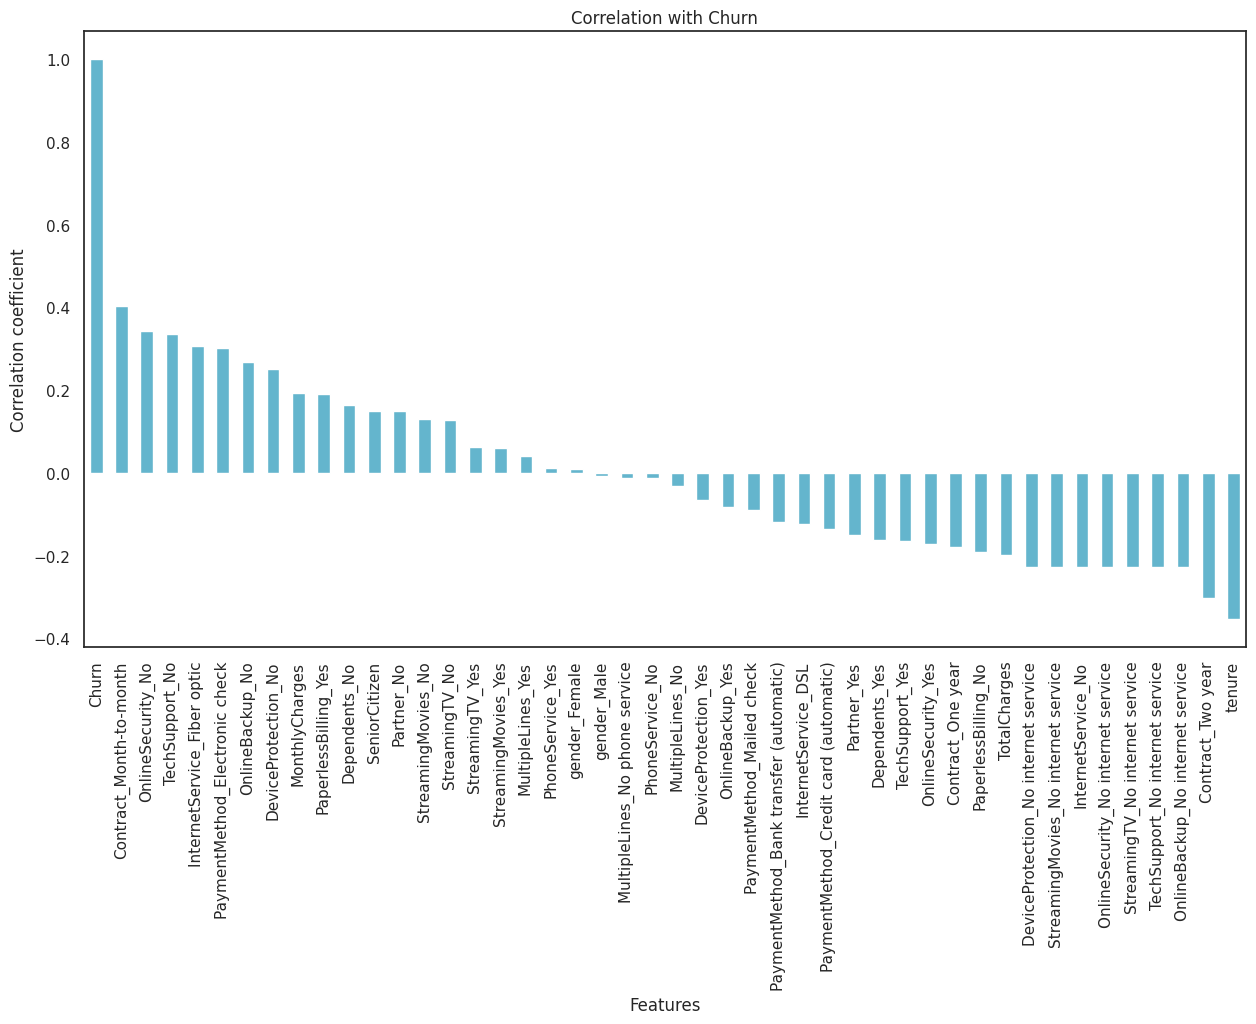

In [14]:
# Plot
plt.figure(figsize=(15,8))
Data_Encoded.corr()['Churn'].sort_values(ascending = False).plot(kind='bar' , color = 'c')
plt.title('Correlation with Churn')
plt.xlabel('Features')
plt.ylabel('Correlation coefficient')
plt.show()

1. Demographics 

In [15]:
Demogarphics =pd.DataFrame(Data[['gender' , 'Partner' , 'Dependents' ,'SeniorCitizen']]) 
Demogarphics.head()

gender Partner Dependents  SeniorCitizen
0  Female     Yes         No              0
1    Male      No         No              0
2    Male      No         No              0
3    Male      No         No              0
4  Female      No         No              0

In [16]:
Demogarphics['SeniorCitizen'].value_counts()

SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

* Turning The SeniorCitizen From a Numerical Variable To Catogrical Variable

In [17]:
Demogarphics["SeniorCitizen"].replace(to_replace= 0 , value= 'No' ,inplace= True)
Demogarphics["SeniorCitizen"].replace(to_replace= 1 , value= 'Yes' , inplace=True)

/tmp/ipykernel_18/2882380710.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Demogarphics["SeniorCitizen"].replace(to_replace= 0 , value= 'No' ,inplace= True)


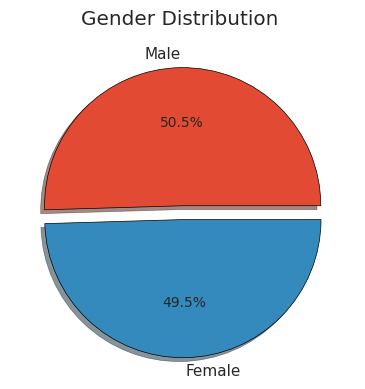

In [18]:
plt.style.use("ggplot")
plt.figure(figsize=(4 ,4))
Gender = Demogarphics['gender'].value_counts()
Gender_Keys = Gender.keys()
Gender_Values = Gender.values
plt.pie(x= Gender_Values , labels= Gender_Keys , explode = [0,0.1] ,
        shadow=True , wedgeprops={"edgecolor":"black"} , autopct = '%1.1f%%')
plt.title('Gender Distribution ')
plt.tight_layout()
plt.show()

 We Know Thay The Gender Distribution is nearly equal

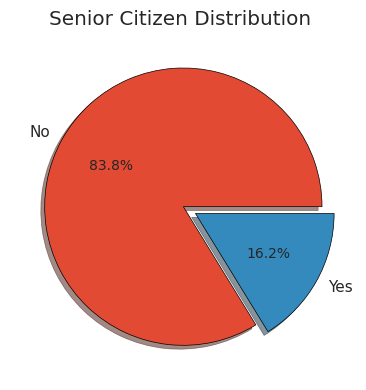

In [19]:
plt.style.use("ggplot")
plt.figure(figsize=(4 ,4))
SeniorCitizen = Demogarphics['SeniorCitizen'].value_counts()
SeniorCitizen_Keys = SeniorCitizen.keys()
SeniorCitizen_Values = SeniorCitizen.values
plt.pie(x= SeniorCitizen_Values , labels= SeniorCitizen_Keys , explode = [0,0.1] ,
        shadow=True , wedgeprops={"edgecolor":"black"} , autopct = '%1.1f%%')
plt.title('Senior Citizen Distribution ')
plt.tight_layout()
plt.show()

 From This We Know That The Major of The Citizan isn't a Senior

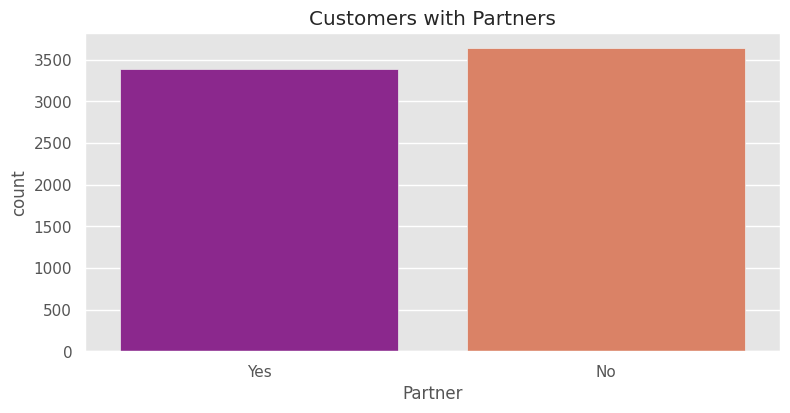

In [20]:
plt.figure(figsize=(8,4))
sns.countplot(data=Demogarphics , x= "Partner", dodge=True , palette="plasma")
plt.tight_layout()
plt.title('Customers with Partners')
plt.show()

we can consider The Count of customers with partner state is equal the count of the customer without Partner

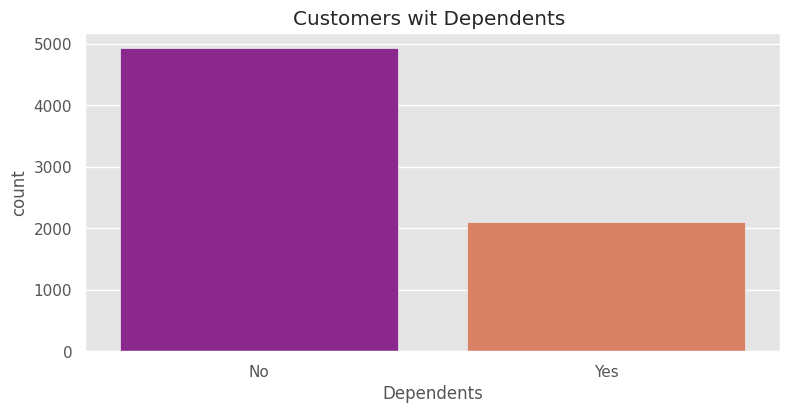

In [21]:
plt.figure(figsize=(8,4))
sns.countplot(data=Demogarphics , x= 'Dependents' , dodge=True , palette="plasma")
plt.tight_layout()
plt.title('Customers wit Dependents ')
plt.show()

The major of customers is without dependents

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


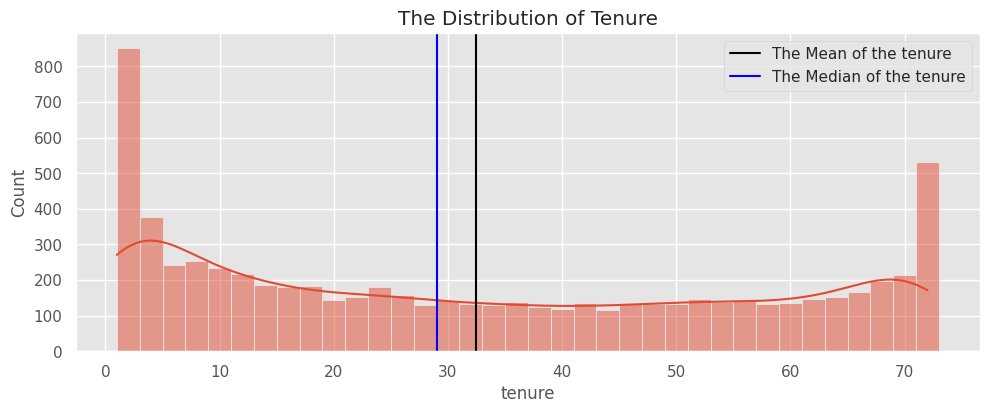

In [22]:
plt.figure(figsize=(10,4))
sns.histplot(Data['tenure'], kde=True , bins ="auto" ,binwidth=2 ,common_norm=True )
plt.axvline(np.mean(Data["tenure"]) , color = "black" , label ="The Mean of the tenure")
plt.axvline(np.median(Data["tenure"]) , color = "blue" , label ="The Median of the tenure")
plt.tight_layout()
plt.legend()
plt.title('The Distribution of Tenure')
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


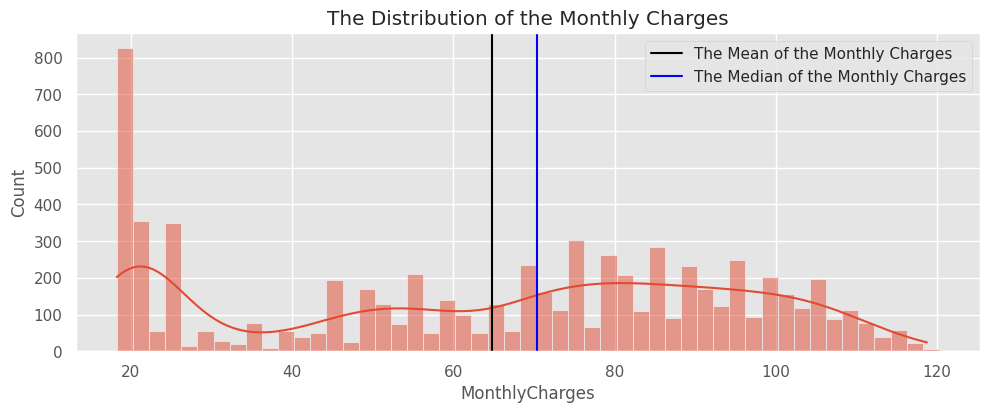

In [23]:
plt.figure(figsize=(10,4))
sns.histplot(Data['MonthlyCharges'], kde=True , bins ="auto" ,binwidth=2 ,common_norm=True )
plt.axvline(np.mean(Data['MonthlyCharges']) , color = "black" , label ="The Mean of the Monthly Charges")
plt.axvline(np.median(Data['MonthlyCharges']) , color = "blue" , label ="The Median of the Monthly Charges")
plt.tight_layout()
plt.legend()
plt.title('The Distribution of the Monthly Charges')
plt.grid(True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


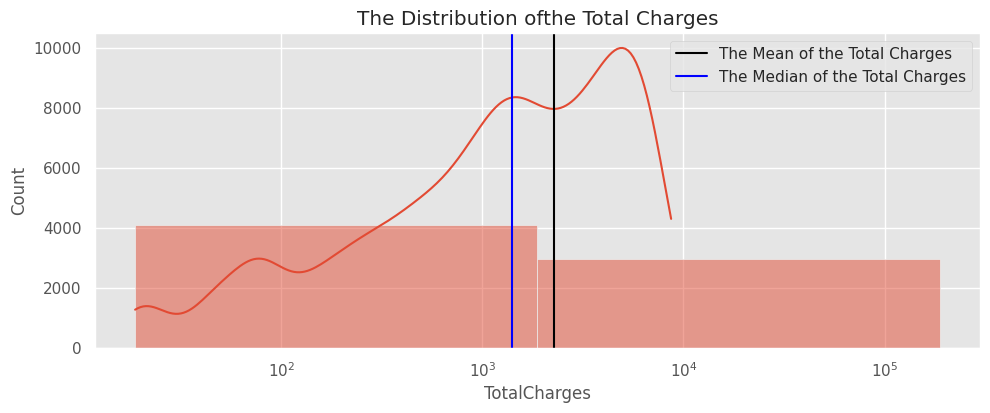

In [24]:
plt.figure(figsize=(10,4))
sns.histplot(Data['TotalCharges'], kde=True ,log_scale=True,  bins = 'auto' ,binwidth=2 ,common_norm=True )
plt.axvline(np.mean(Data['TotalCharges']) , color = "black" , label ="The Mean of the Total Charges")
plt.axvline(np.median(Data['TotalCharges']) , color = "blue" , label ="The Median of the Total Charges")
plt.tight_layout()
plt.legend()
plt.title('The Distribution ofthe Total Charges')
plt.grid(True)
plt.show()

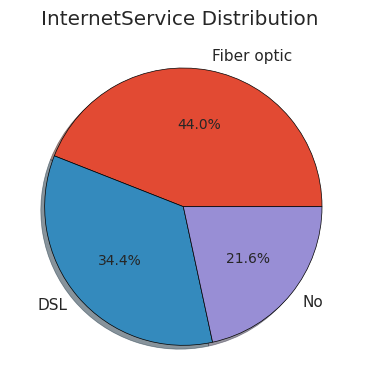

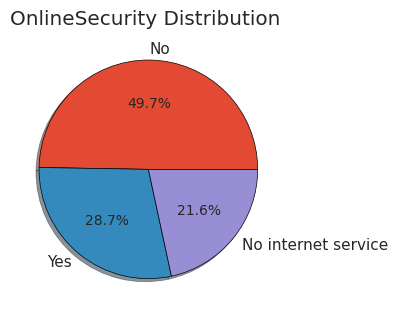

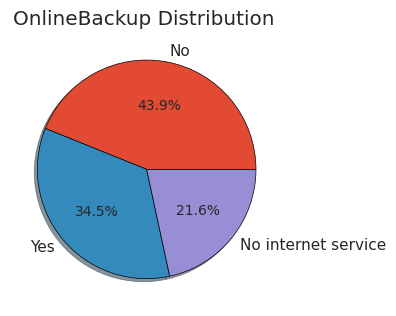

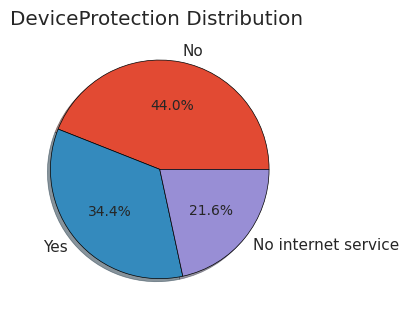

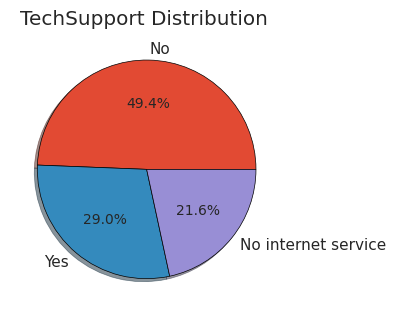

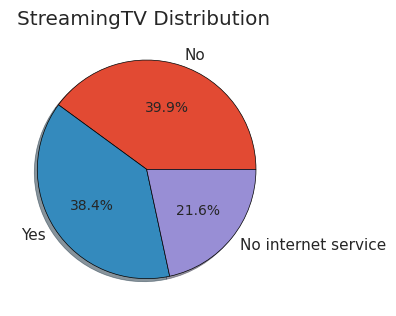

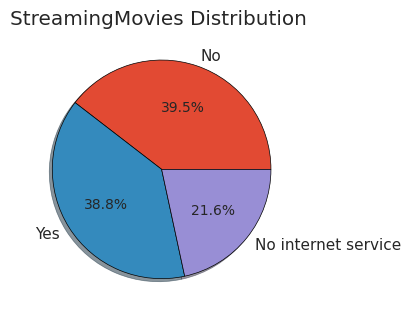

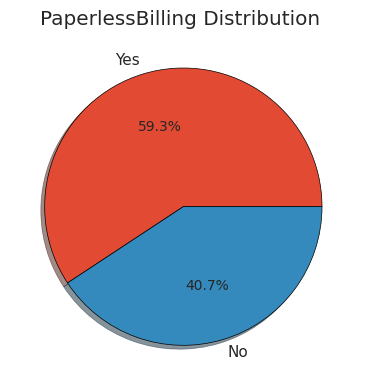

In [25]:
pieChart =['InternetService' ,'OnlineSecurity', 'OnlineBackup',
           'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies','PaperlessBilling']
for i in pieChart:
    plt.style.use("ggplot")
    plt.figure(figsize=(4 ,4))
    Gender = Data[i].value_counts()
    Gender_Keys = Gender.keys()
    Gender_Values = Gender.values
    plt.pie(x= Gender_Values , labels= Gender_Keys  ,
            shadow=True , wedgeprops={"edgecolor":"black"} , autopct = '%1.1f%%')
    plt.title(f'{i} Distribution ')
    plt.tight_layout()
    plt.show()

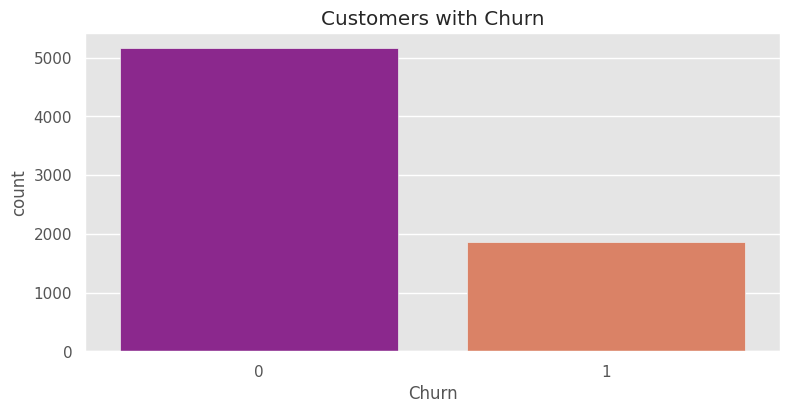

In [26]:
plt.figure(figsize=(8,4))
sns.countplot(data=Data , x= "Churn", dodge=True , palette="plasma" )
plt.tight_layout()
plt.title('Customers with Churn')
plt.show()

The Amount of Customers who's leave the service is small 

In [27]:
CatogriesData = ['gender','SeniorCitizen','Partner','Dependents',]

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


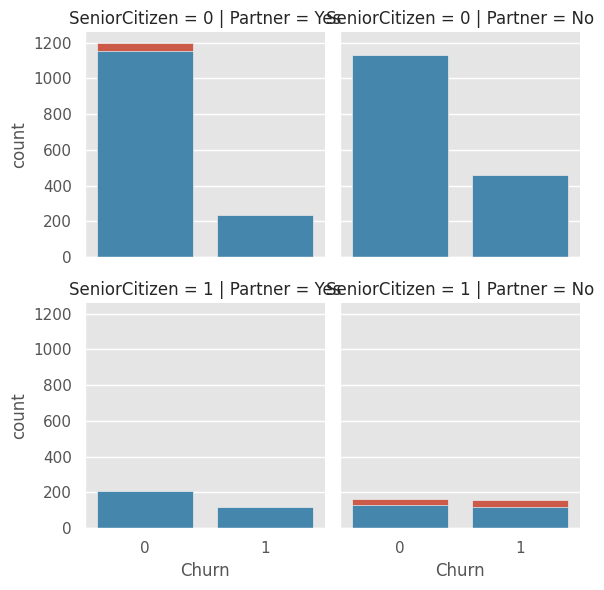

In [28]:
G = sns.FacetGrid(data=Data , col='Partner', row="SeniorCitizen" , hue= "gender")
G.map(sns.countplot, "Churn" )

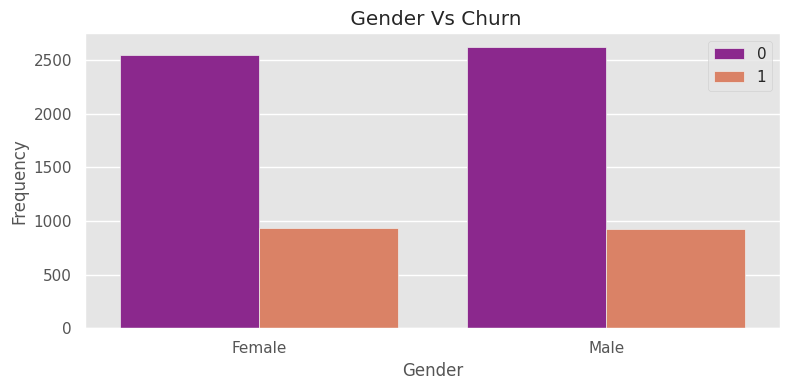

In [29]:
plt.figure(figsize=(8,4))
sns.countplot(data=Data , x= 'gender' , hue='Churn' , palette="plasma" )
plt.title(" Gender Vs Churn")
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.tight_layout()
plt.legend()
plt.show()

there is no gender is greater in leaving the service or staying

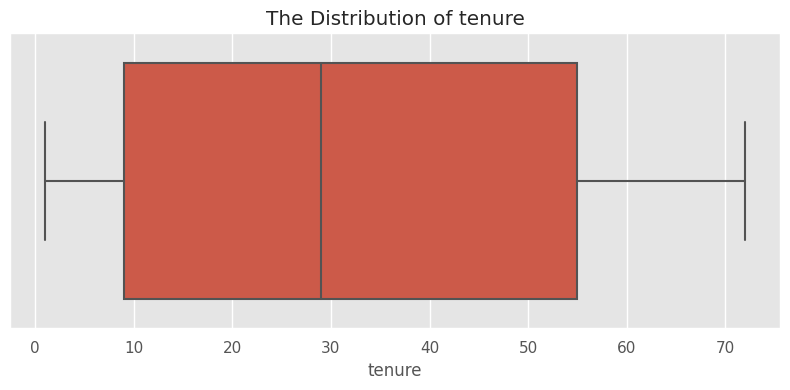

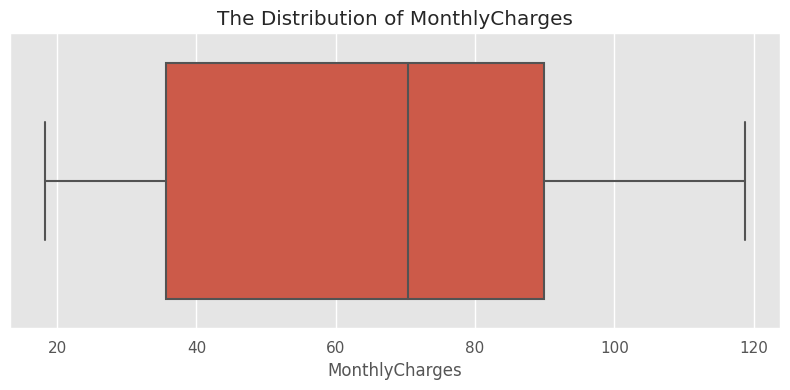

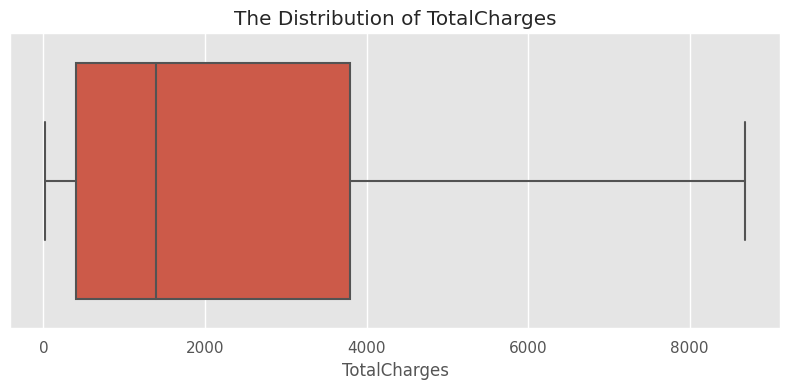

In [30]:
NummericalValues = ['tenure' , 'MonthlyCharges','TotalCharges']
for i in NummericalValues:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=Data , x= i)
    plt.title(f"The Distribution of {i}")
    plt.tight_layout()
    plt.show()

From These Boxplots we know that our nummmerical Data has no Outliers "Data Noraml Distribution"

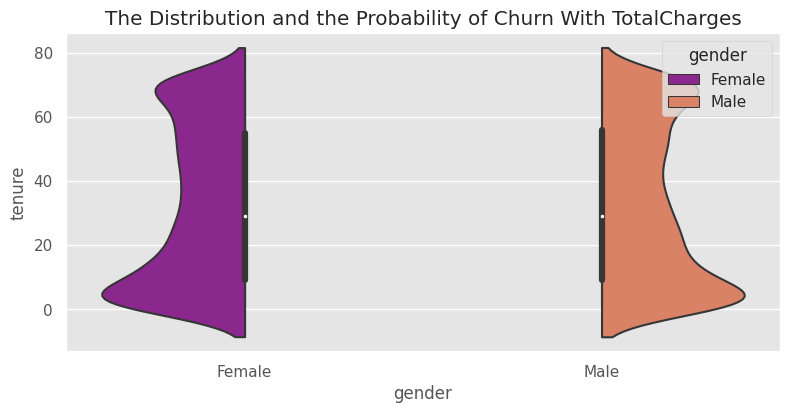

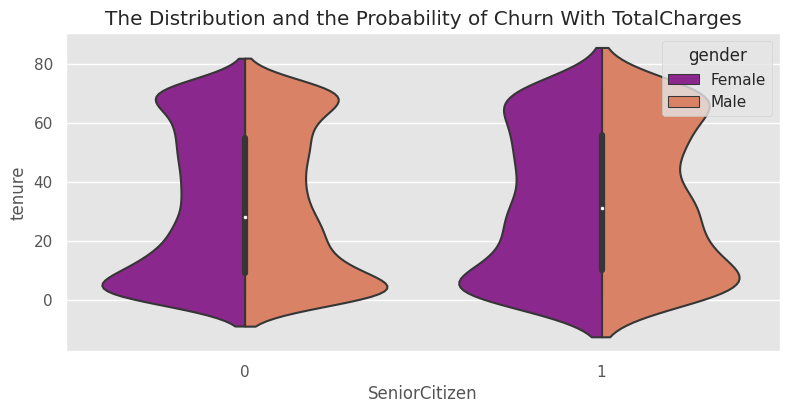

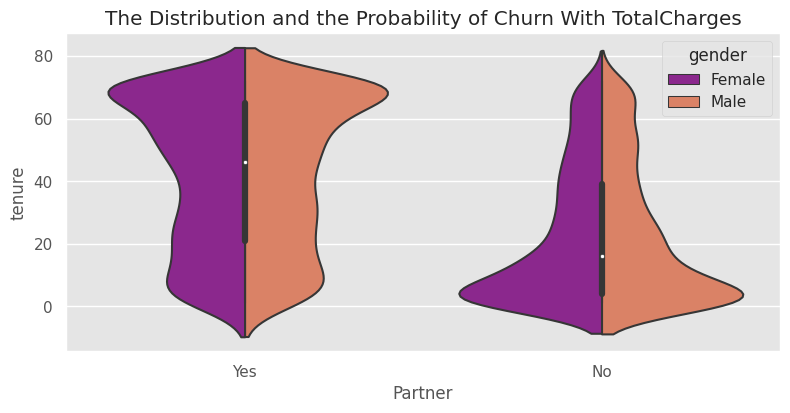

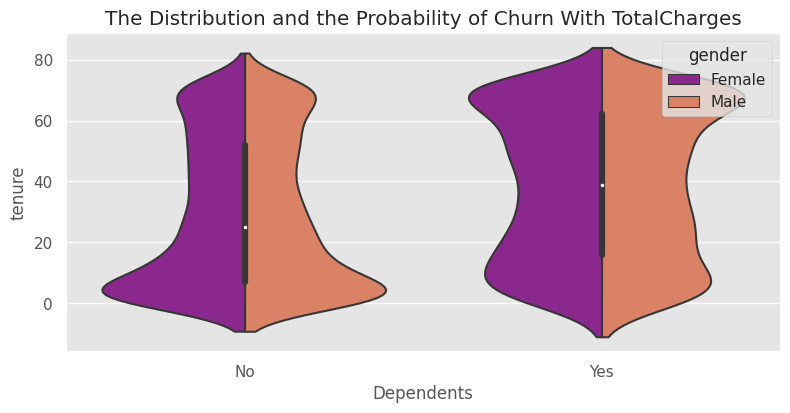

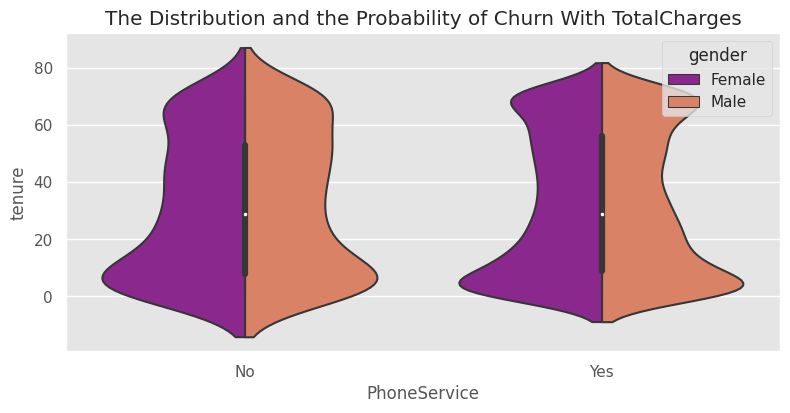

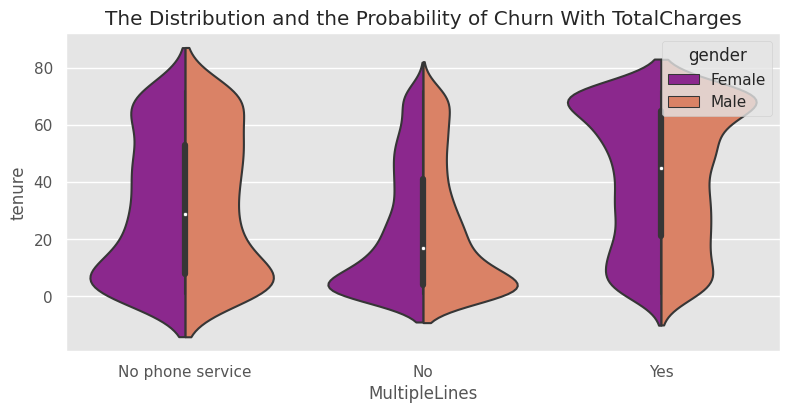

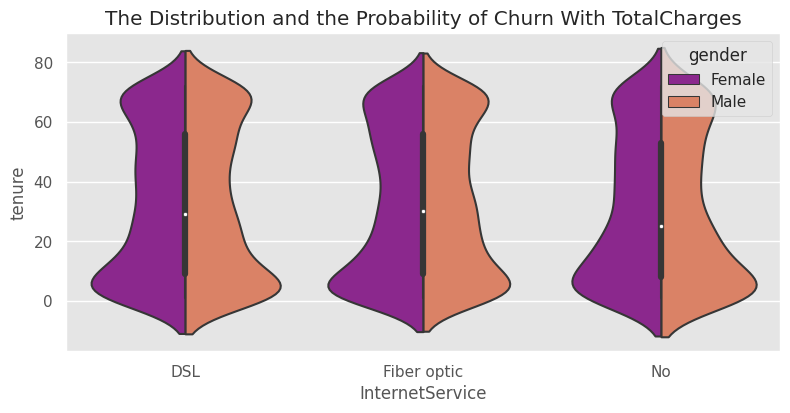

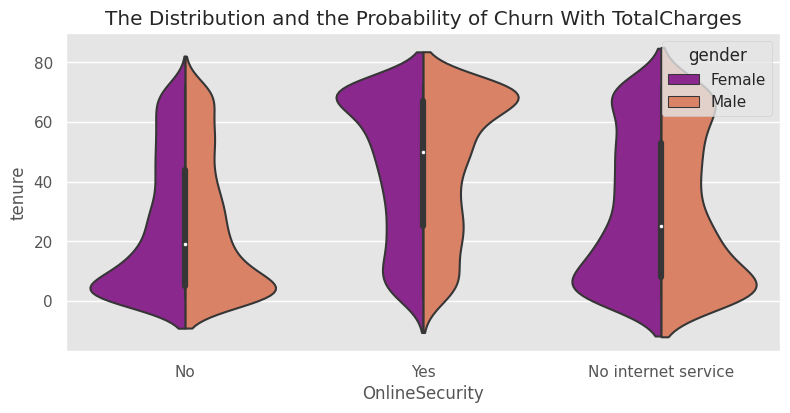

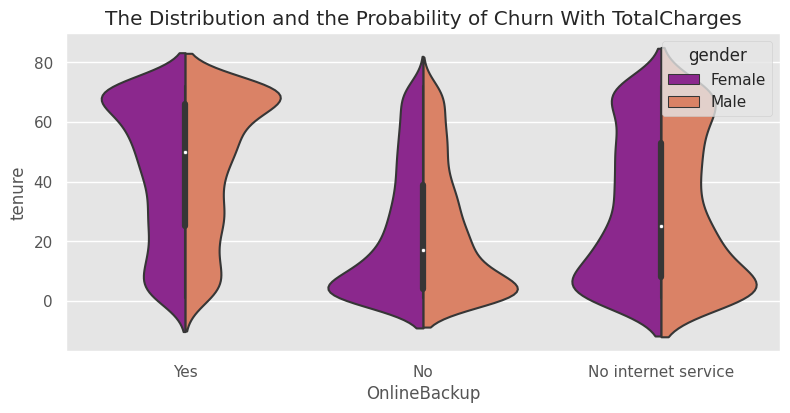

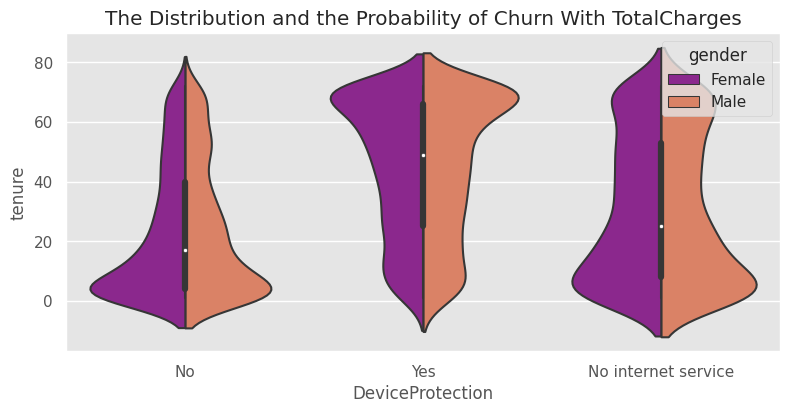

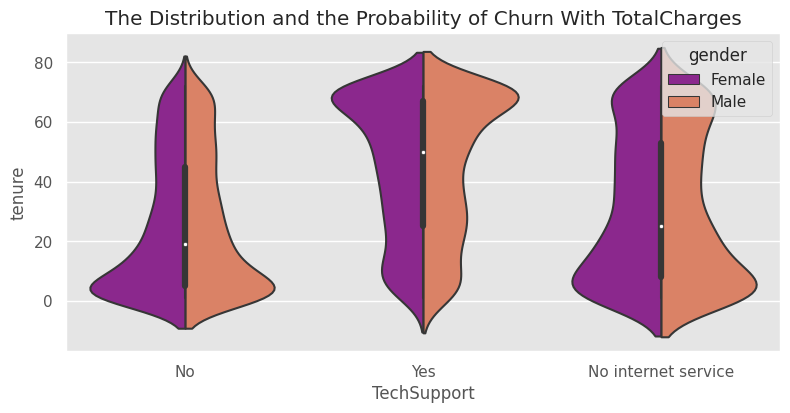

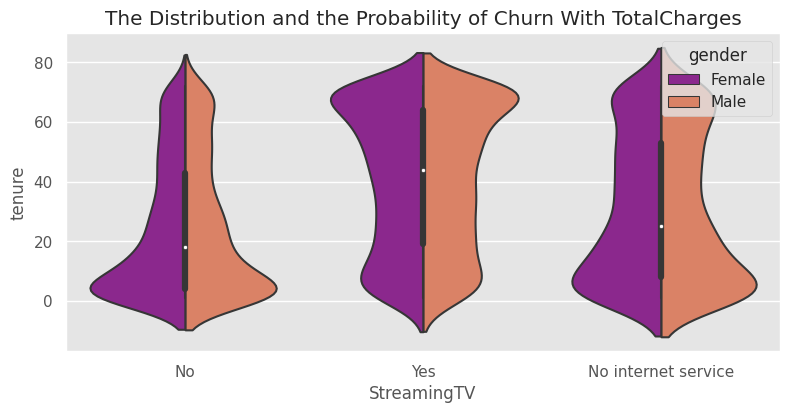

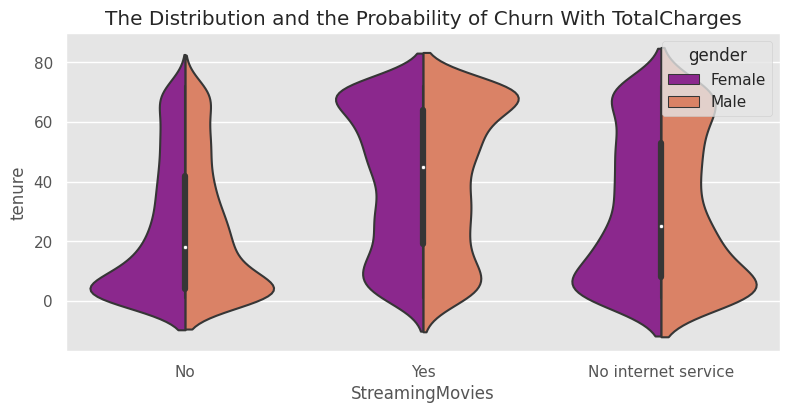

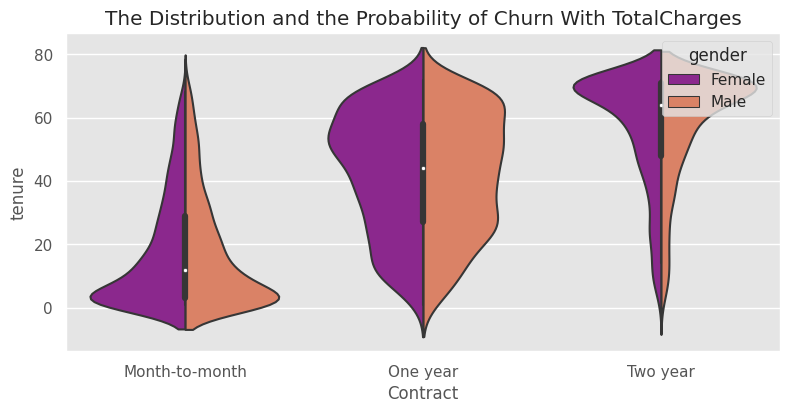

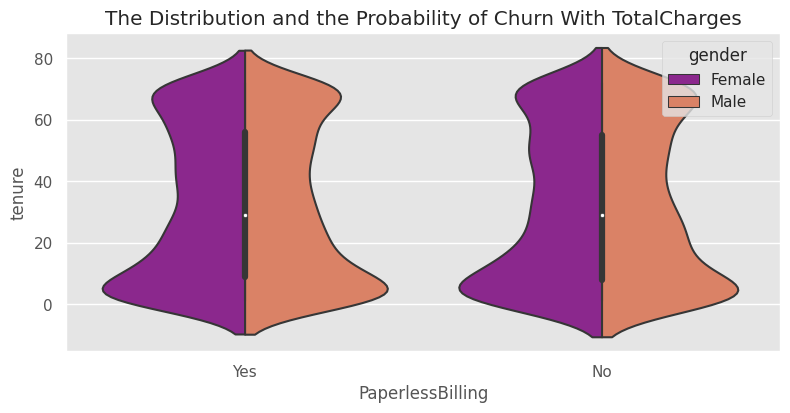

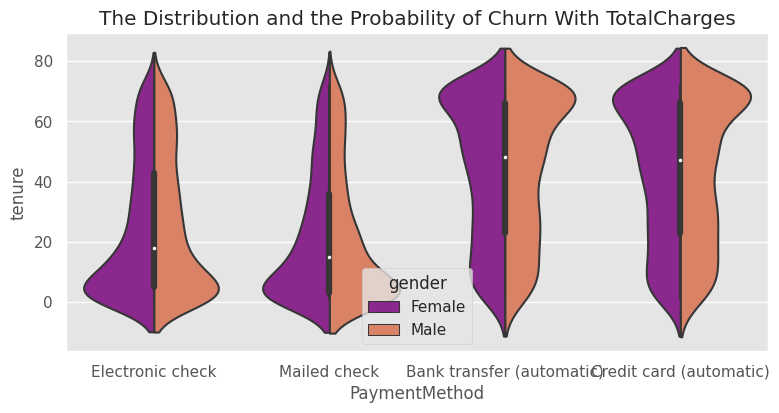

In [31]:
CatogricalFeatures = ['gender','SeniorCitizen' , 'Partner' , 'Dependents' ,
                      'PhoneService' ,'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                      'TechSupport','StreamingTV', 'StreamingMovies', 'Contract',
                      'PaperlessBilling','PaymentMethod']
for  j in  CatogricalFeatures:
    plt.figure(figsize=(8,4))
    sns.violinplot( x =j , y=NummericalValues[0] , data = Data , hue=Data['gender'] , split=True , palette="plasma")
    plt.tight_layout()
    plt.title(f"The Distribution and the Probability of Churn With {i}")
    plt.show()

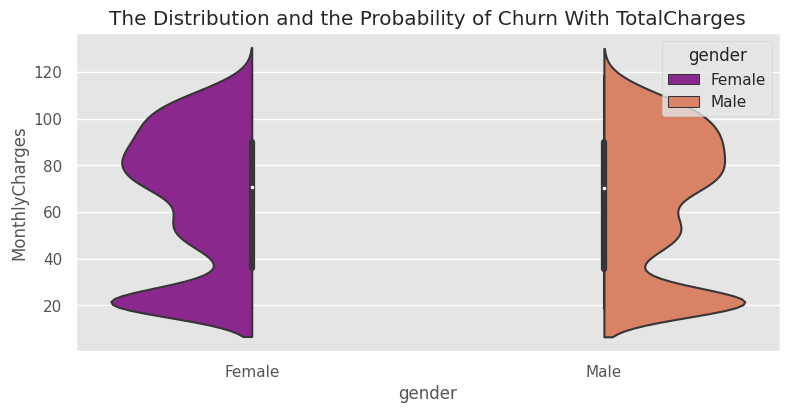

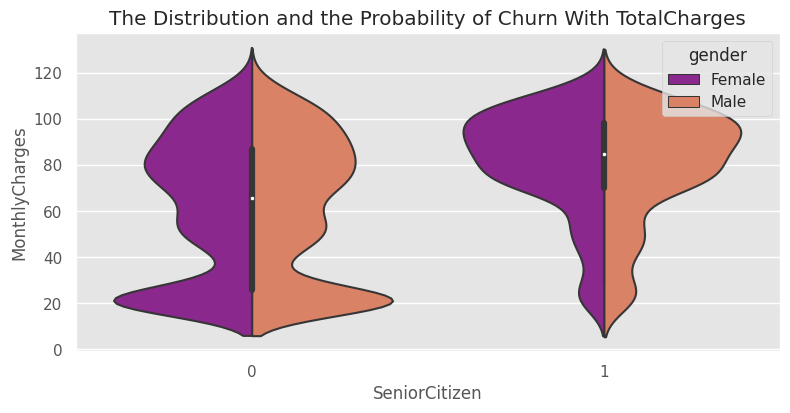

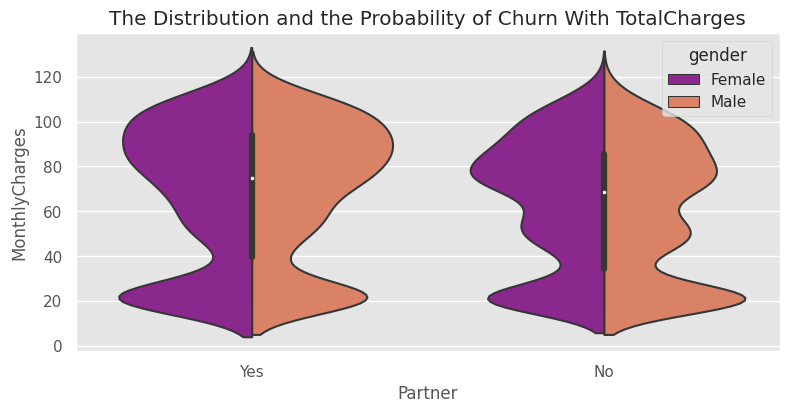

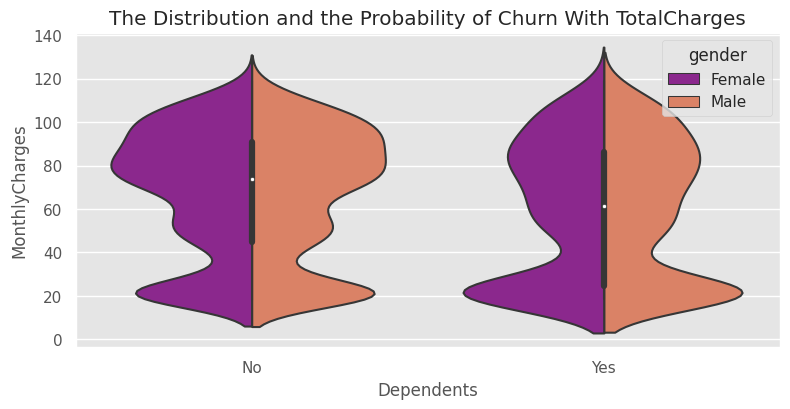

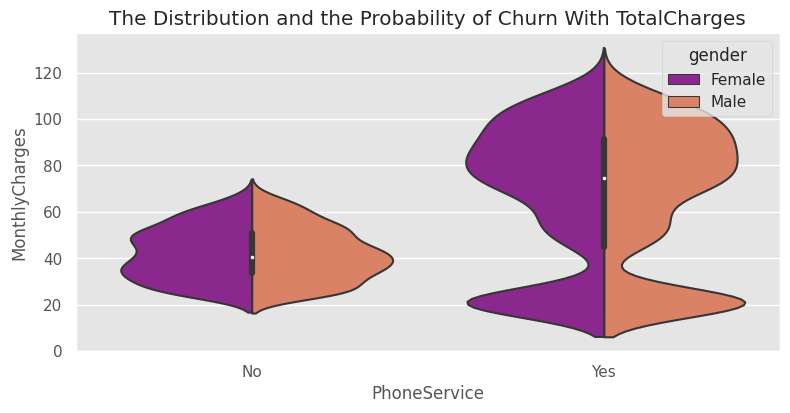

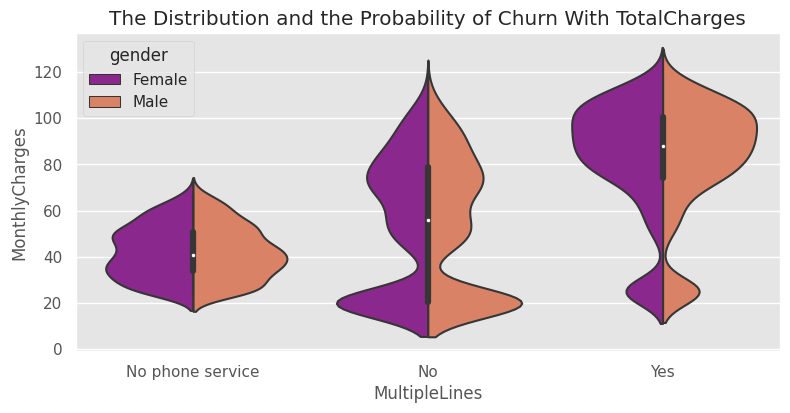

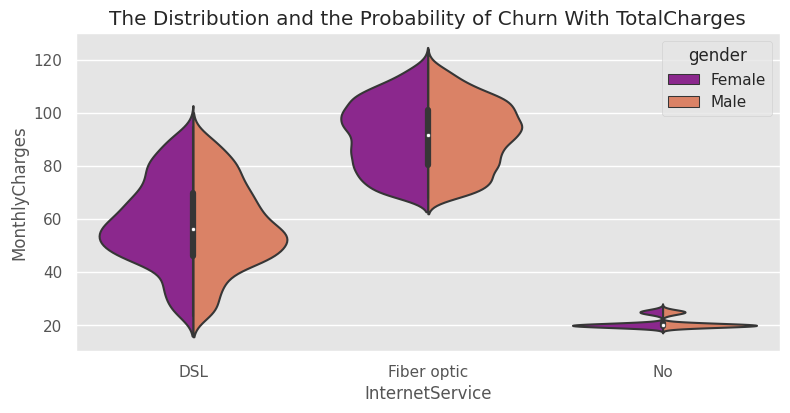

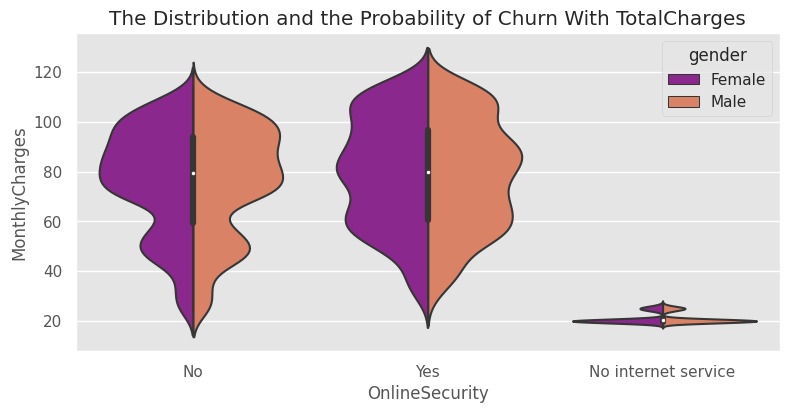

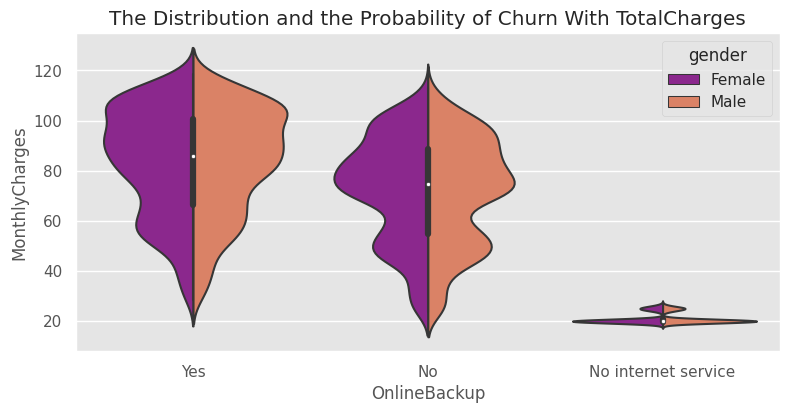

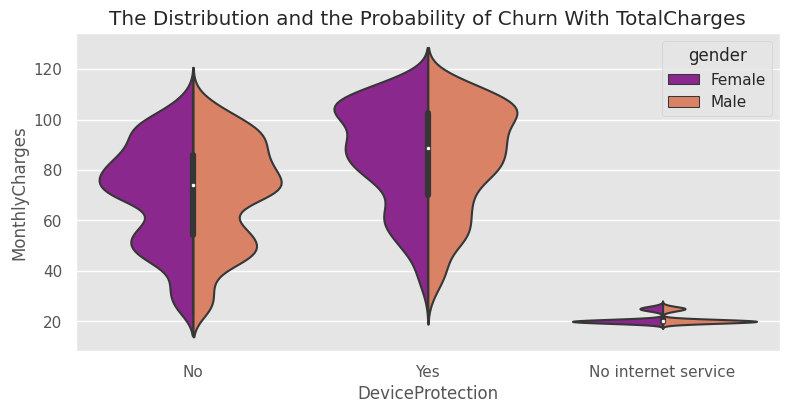

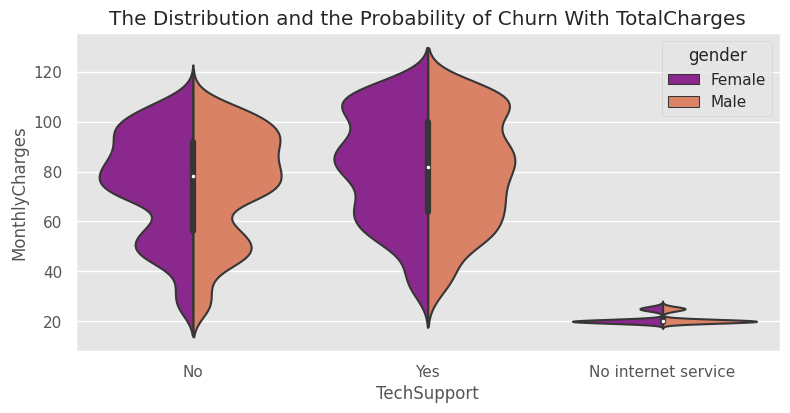

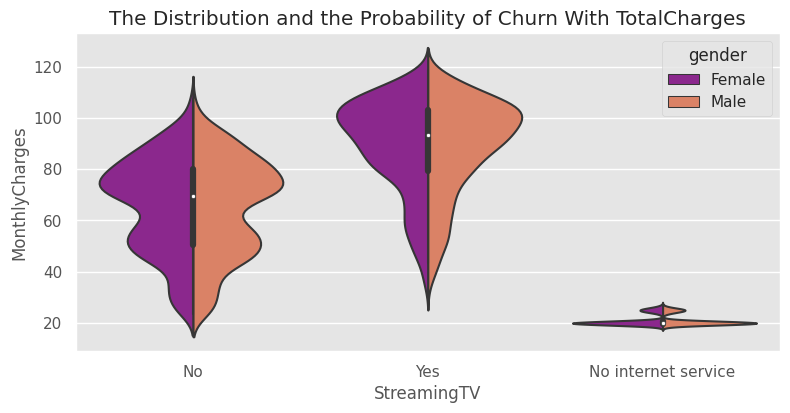

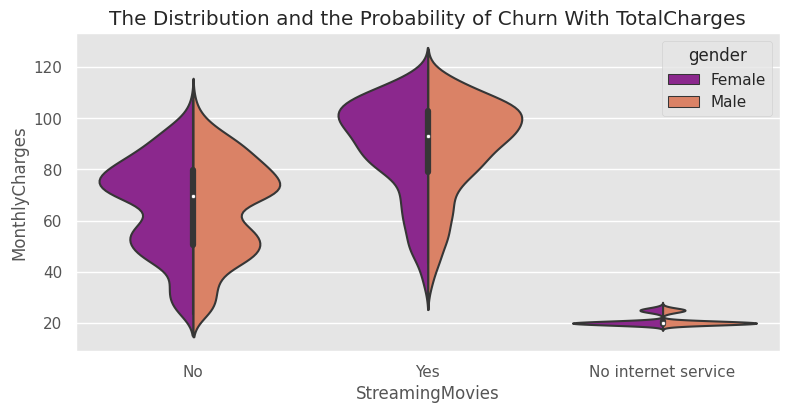

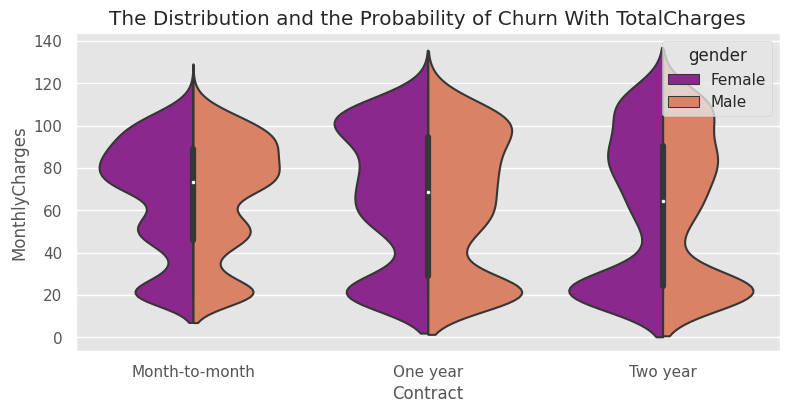

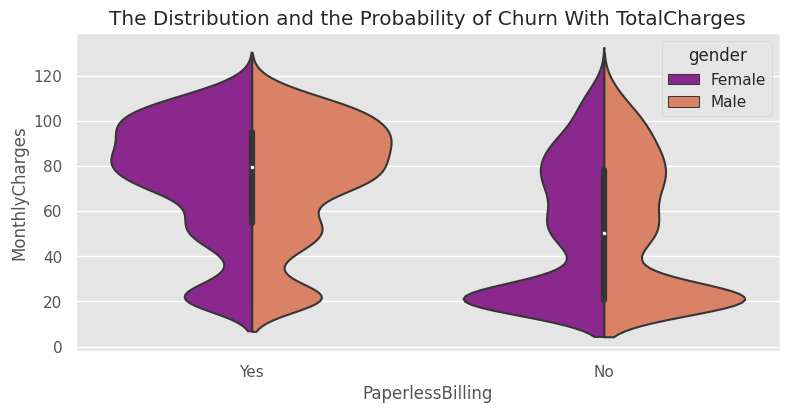

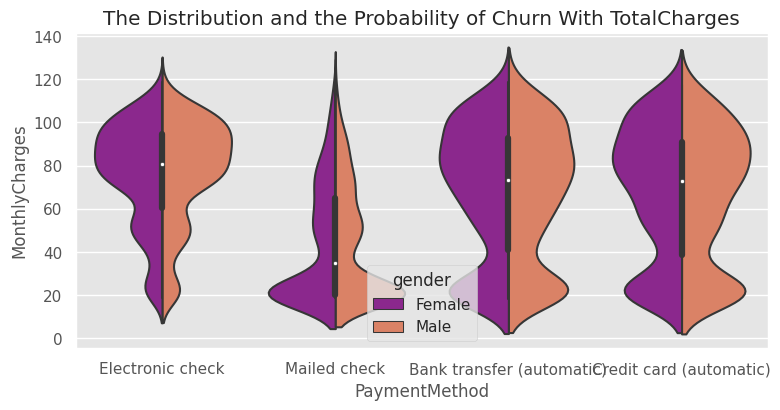

In [32]:
CatogricalFeatures = ['gender','SeniorCitizen' , 'Partner' , 'Dependents' ,
                      'PhoneService' ,'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                      'TechSupport','StreamingTV', 'StreamingMovies', 'Contract',
                      'PaperlessBilling','PaymentMethod']
for  j in  CatogricalFeatures:
    plt.figure(figsize=(8,4))
    sns.violinplot( x =j , y=NummericalValues[1] , data = Data , hue=Data['gender'] , split=True , palette="plasma")
    plt.tight_layout()
    plt.title(f"The Distribution and the Probability of Churn With {i}")
    plt.show()

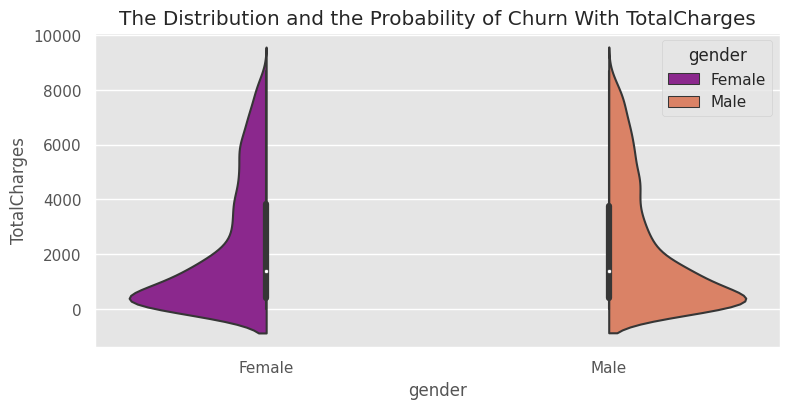

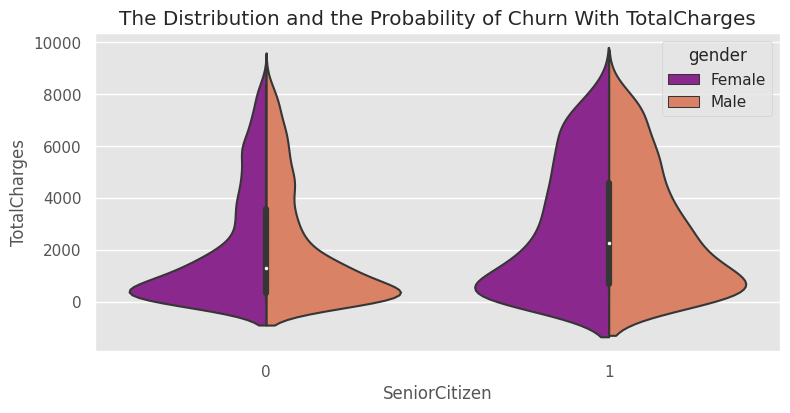

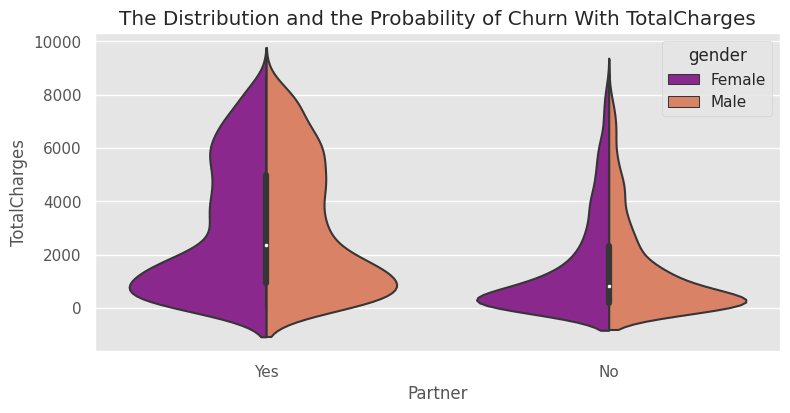

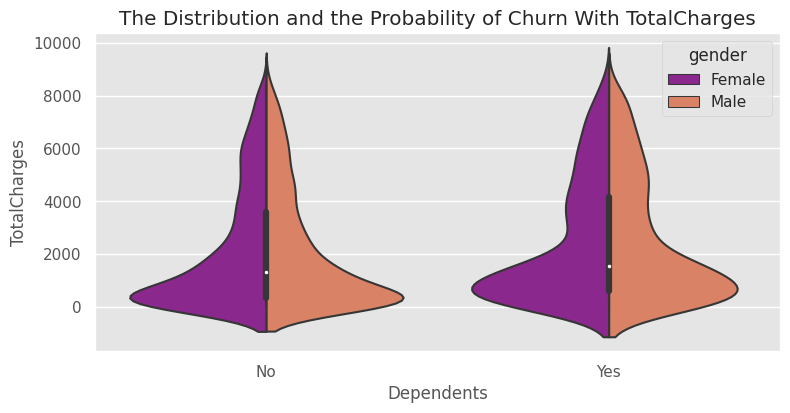

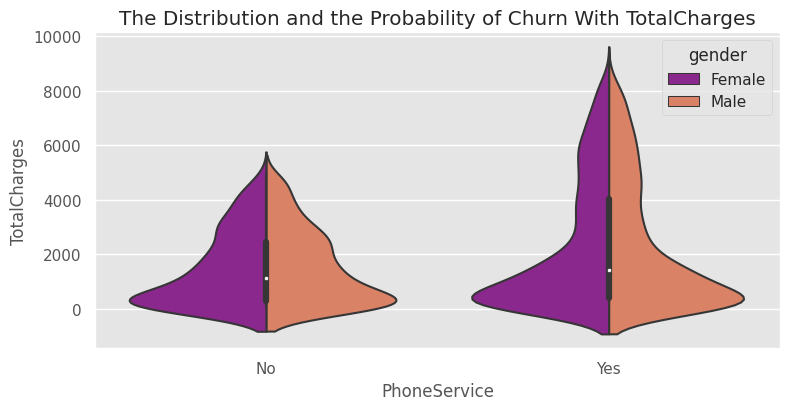

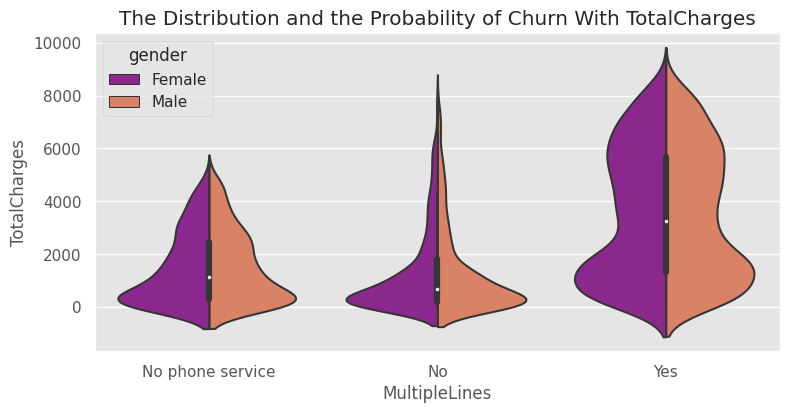

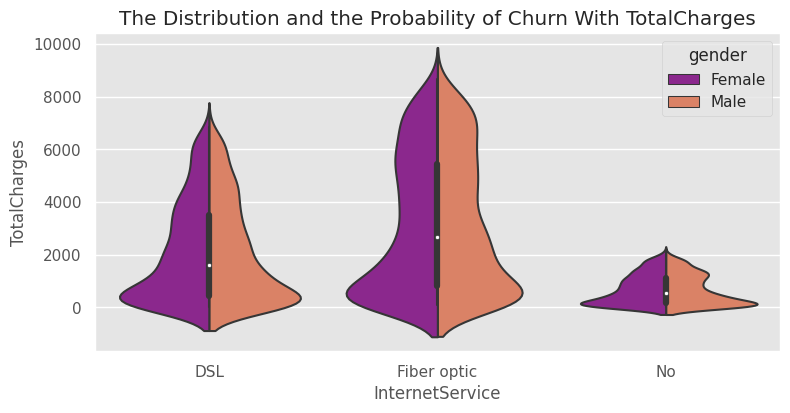

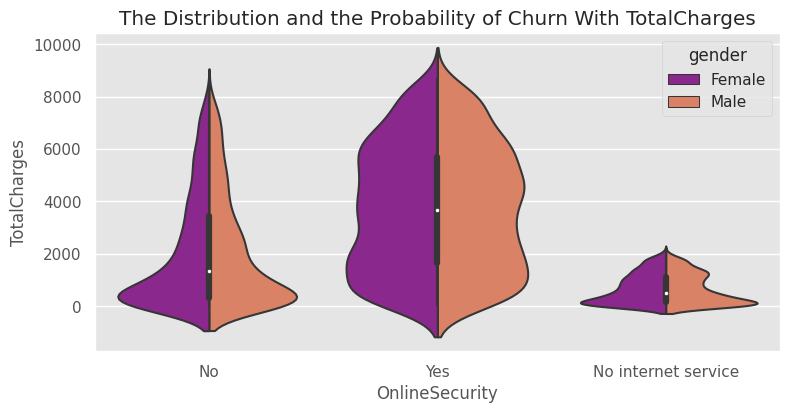

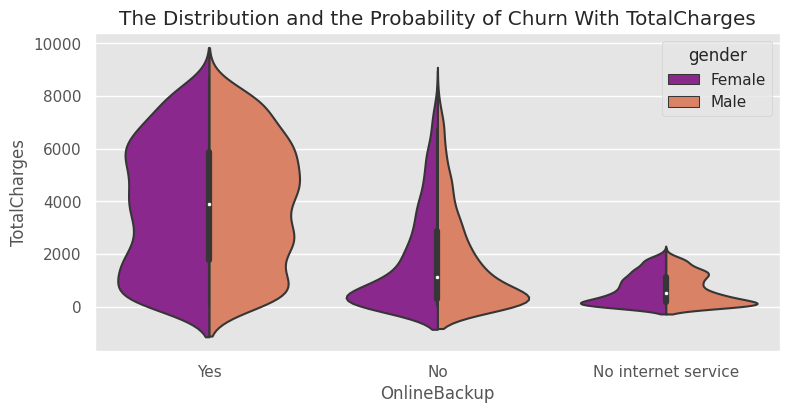

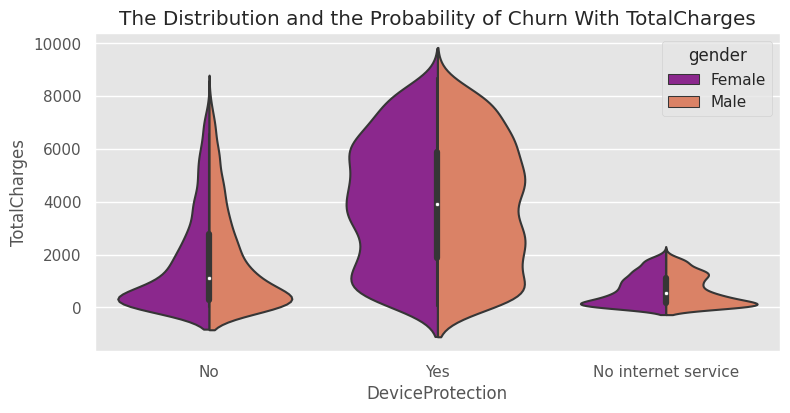

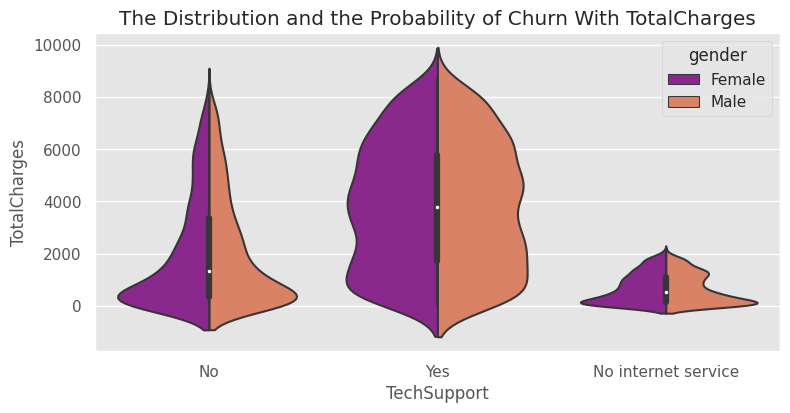

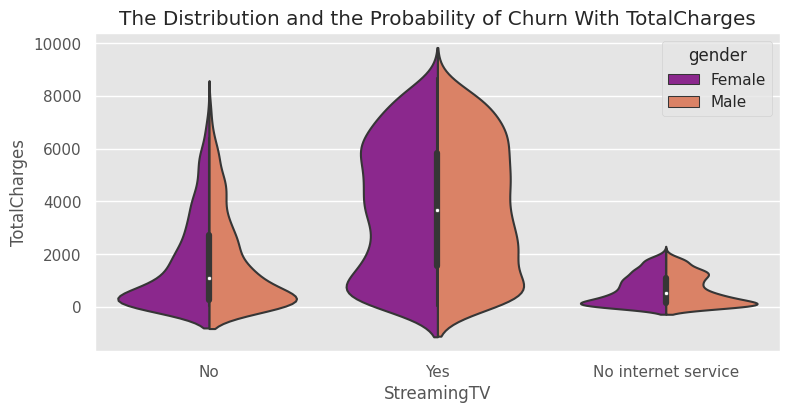

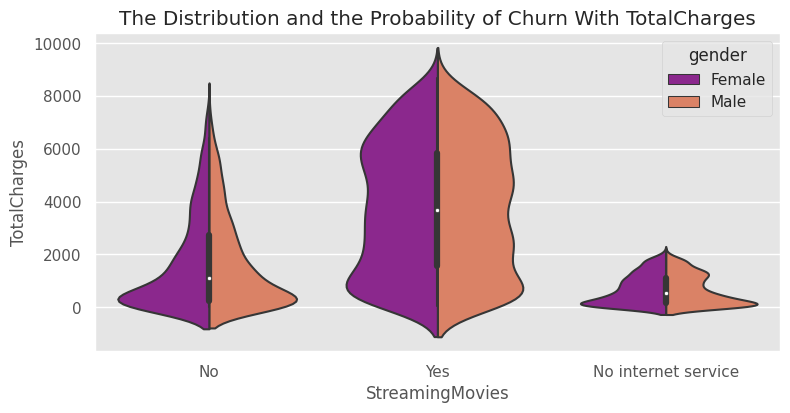

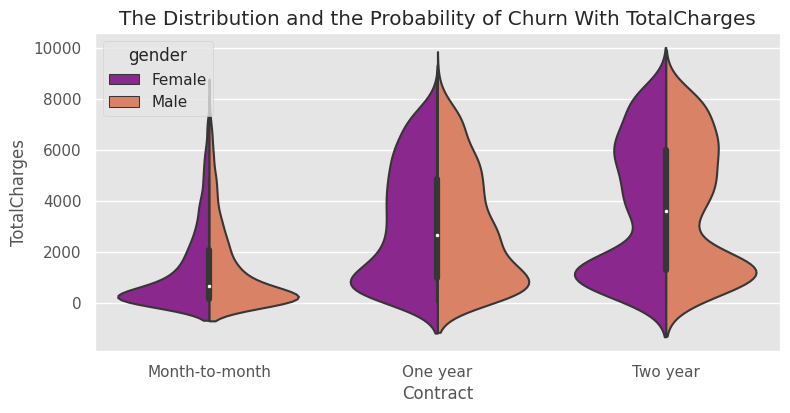

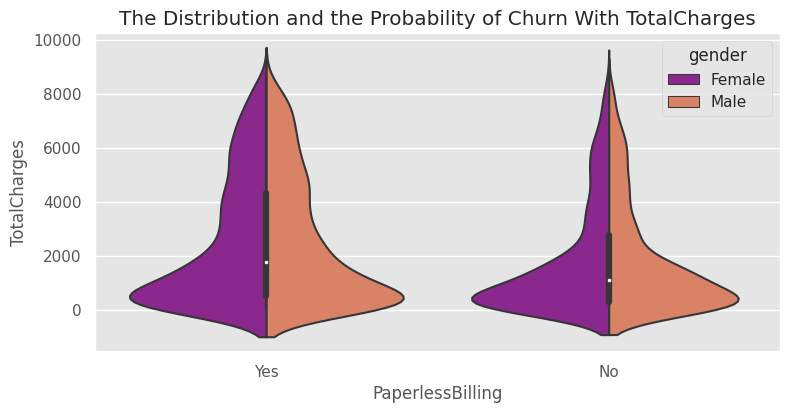

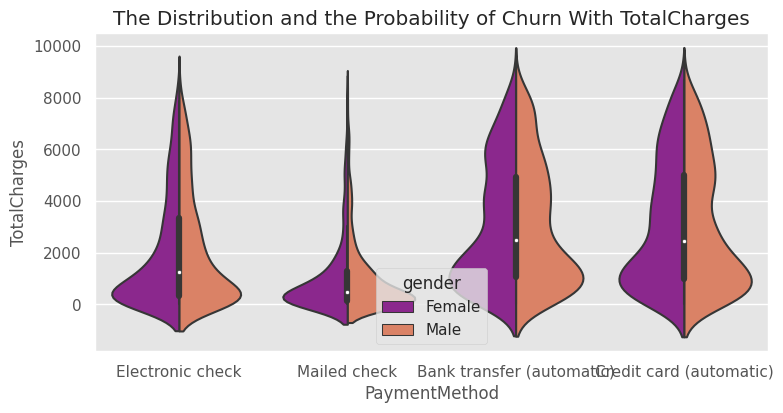

In [33]:
CatogricalFeatures = ['gender','SeniorCitizen' , 'Partner' , 'Dependents' ,
                      'PhoneService' ,'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                      'TechSupport','StreamingTV', 'StreamingMovies', 'Contract',
                      'PaperlessBilling','PaymentMethod']
for  j in  CatogricalFeatures:
    plt.figure(figsize=(8,4))
    sns.violinplot( x =j , y=NummericalValues[2] , data = Data , hue=Data['gender'] , split=True , palette="plasma")
    plt.tight_layout()
    plt.title(f"The Distribution and the Probability of Churn With {i}")
    plt.show()

In [34]:
Data.groupby(['gender','SeniorCitizen']).count()

Partner  Dependents  tenure  PhoneService  \
gender SeniorCitizen                                              
Female 0                 2915        2915    2915          2915   
       1                  568         568     568           568   
Male   0                 2975        2975    2975          2975   
       1                  574         574     574           574   

                      MultipleLines  InternetService  OnlineSecurity  \
gender SeniorCitizen                                                   
Female 0                       2915             2915            2915   
       1                        568              568             568   
Male   0                       2975             2975            2975   
       1                        574              574             574   

                      OnlineBackup  DeviceProtection  TechSupport  \
gender SeniorCitizen                                                
Female 0                      2915              2915         2915   
       1                       568               568          568   
Male   0                      2975              2975         2975   
       1                       574               574          574   

                      StreamingTV  StreamingMovies  Contract  \
gender SeniorCitizen                                           
Female 0                     2915             2915      2915   
       1                      568              568       568   
Male   0                     2975             2975      2975   
       1                      574              574       574   

                      PaperlessBilling  PaymentMethod  MonthlyCharges  \
gender SeniorCitizen                                                    
Female 0                          2915           2915            2915   
       1                           568            568             568   
Male   0                          2975           2975            2975   
       1                           574            574             574   

                      TotalCharges  Churn  
gender SeniorCitizen                       
Female 0                      2915   2915  
       1                       568    568  
Male   0                      2975   2975  
       1                       574    574

# `Scalling Our Data And Turing it Into Features And Target`

* Turning Data into Feature and Target

In [35]:
x = Data_Encoded.drop("Churn" , axis= 1 )
x.head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Female  \
0              0       1           29.85         29.85           True   
1              0      34           56.95       1889.50          False   
2              0       2           53.85        108.15          False   
3              0      45           42.30       1840.75          False   
4              0       2           70.70        151.65           True   

   gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  ...  \
0        False       False         True           True           False  ...   
1         True        True        False           True           False  ...   
2         True        True        False           True           False  ...   
3         True        True        False           True           False  ...   
4        False        True        False           True           False  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                False                     True              False   
1                False                    False               True   
2                False                     True              False   
3                False                    False               True   
4                False                     True              False   

   Contract_Two year  PaperlessBilling_No  PaperlessBilling_Yes  \
0              False                False                  True   
1              False                 True                 False   
2              False                False                  True   
3              False                 True                 False   
4              False                False                  True   

   PaymentMethod_Bank transfer (automatic)  \
0                                    False   
1                                    False   
2                                    False   
3                                     True   
4                                    False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  
0                       False  
1                        True  
2                        True  
3                       False  
4                       False  

[5 rows x 45 columns]

In [36]:
y = Data_Encoded["Churn"].values
y

array([0, 0, 1, ..., 0, 1, 0])

* Scalling Our Data Using MinMax Scaller

In [37]:
from sklearn.preprocessing import MinMaxScaler
Features = x.columns.values
Scaller = MinMaxScaler(feature_range=(0,1))
Scaller.fit(x)
x = pd.DataFrame(Scaller.fit_transform(x))
x.columns = Features

* Splitting Our Data Into Training and Testing Sets `(70% & 30%)`

In [38]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(x , y , test_size = 0.3 , random_state = 101)

In [39]:
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((4922, 45), (2110, 45), (4922,), (2110,))

# `Classification Matrices `

In [40]:
from sklearn.metrics import accuracy_score , classification_report , f1_score , precision_score , recall_score , confusion_matrix
import seaborn as sns
from sklearn.model_selection import cross_val_score
def Classification_Matrics (y_true, y_pred , Model , x , y ,Number_of_cv):
    Acc_Score = np.round(accuracy_score(y_true, y_pred),2)
    print("---------------------------------------------------------------")
    print(f"The Accuracy is {Acc_Score *100}%")
    print("---------------------------------------------------------------")
    Class_report = classification_report(y_true, y_pred)
    print("---------------------------------------------------------------")
    print(f"THe Classification Report \n {Class_report}")
    print("---------------------------------------------------------------")
    f_1 = np.round(f1_score(y_true, y_pred),2)
    print("---------------------------------------------------------------")
    print(f"The F_1 Score Is {f_1}" )
    print("---------------------------------------------------------------")
    precision = np.round(precision_score(y_true, y_pred),2)
    print("---------------------------------------------------------------")
    print(f"The Precision Score Is {precision}")
    print("---------------------------------------------------------------")
    recall = np.round(recall_score(y_true, y_pred),2)
    print("---------------------------------------------------------------")
    print(f"The Recall Score Is {recall}")
    print("---------------------------------------------------------------")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm)
    print("---------------------------------------------------------------")
    cv = np.mean(cross_val_score(Model , x , y , cv= Number_of_cv))
    print(f"The Cross Val Accuracy Is {np.round(cv * 100, 2)}% ")
    print("---------------------------------------------------------------")

# `Logistics Regression` 

In [41]:
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression(max_iter=200)
Model.fit(X_train,Y_train)

LogisticRegression(max_iter=200)

In [42]:
from sklearn import metrics
Prediction_test = Model.predict(X_test)
print(f"The Model Accuracy is {metrics.accuracy_score(Y_test , Prediction_test)}")

The Model Accuracy is 0.8075829383886256


In [43]:
weights = pd.Series(Model.coef_[0],
                   index=x.columns.values)

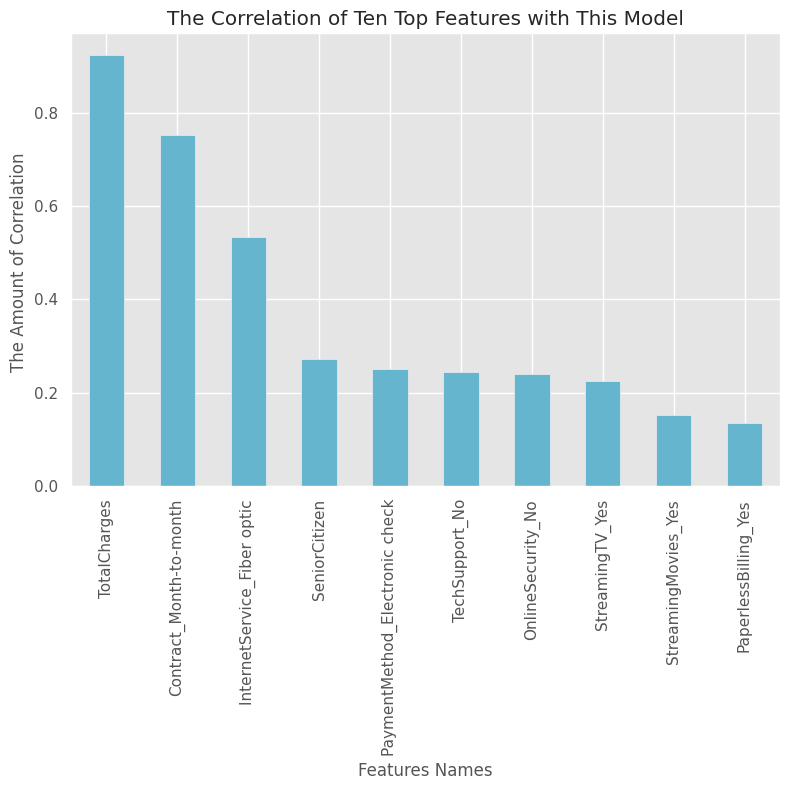

In [44]:
plt.figure(figsize=(8,8))
weights.sort_values(ascending=False)[:10].plot(kind='bar', color ='c')
plt.title('The Correlation of Ten Top Features with This Model')
plt.xlabel('Features Names')
plt.ylabel('The Amount of Correlation ')
plt.tight_layout()
plt.show()

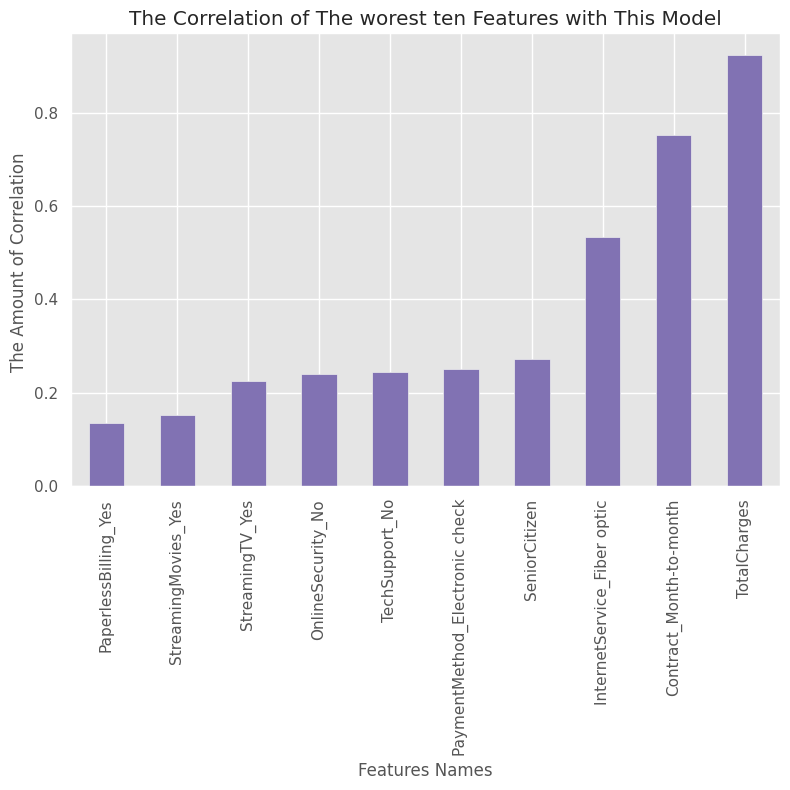

In [45]:
plt.figure(figsize=(8,8))
weights.sort_values(ascending=True)[-10:].plot(kind='bar', color ='m')
plt.title('The Correlation of The worest ten Features with This Model')
plt.xlabel('Features Names')
plt.ylabel('The Amount of Correlation ')
plt.tight_layout()
plt.show()

---------------------------------------------------------------
The Accuracy is 81.0%
---------------------------------------------------------------
---------------------------------------------------------------
THe Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.64      0.54      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110

---------------------------------------------------------------
---------------------------------------------------------------
The F_1 Score Is 0.58
---------------------------------------------------------------
---------------------------------------------------------------
The Precision Score Is 0.64
---------------------------------------------------------------
-------------------------------------------------------------

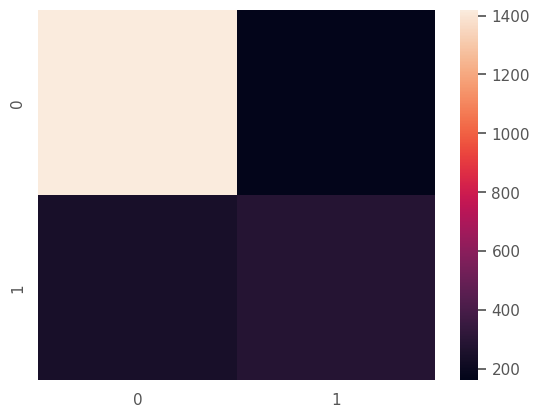

In [46]:
Classification_Matrics(Y_test,Prediction_test,Model,x,y, Number_of_cv=5)

# `Random Forest`

In [47]:
from sklearn.ensemble import RandomForestClassifier
Model_1 = RandomForestClassifier( n_estimators= 1000,
                                 min_samples_split = 2,
                                 min_samples_leaf = 4,
                                 max_features = 'sqrt',
                                 max_depth = 30)
Model_1.fit(X_train,Y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=4, n_estimators=1000)

In [48]:
Prediction_test_1 = Model_1.predict(X_test)
print(f"The Model Accuracy is {metrics.accuracy_score(Y_test , Prediction_test_1)}")

The Model Accuracy is 0.809478672985782


# `Tuning Paramters in Randam Forest Classifier `

In [49]:
from sklearn.model_selection import RandomizedSearchCV
grid ={'n_estimators':[10,100,200,500,1000,1200],
       'max_depth':[None , 5,10,20,30],
       'max_features':["auto" , "sqrt"],
         'min_samples_split':[2,4,6],
          'min_samples_leaf':[1,2,4]}
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
Model = RandomForestClassifier(n_jobs= -1)

RSCv =RandomizedSearchCV(estimator=Model ,
                        param_distributions=grid ,
                        n_iter= 20 ,
                        cv = 5 ,
                        verbose= 2 ,
                         n_jobs=-1)
RSCv.fit(X_train ,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [50]:
RSCv.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=500, n_jobs=-1)

In [51]:
RSCv.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

In [52]:
Importances = Model_1.feature_importances_
weights = pd.Series(Importances , index= x.columns.values)

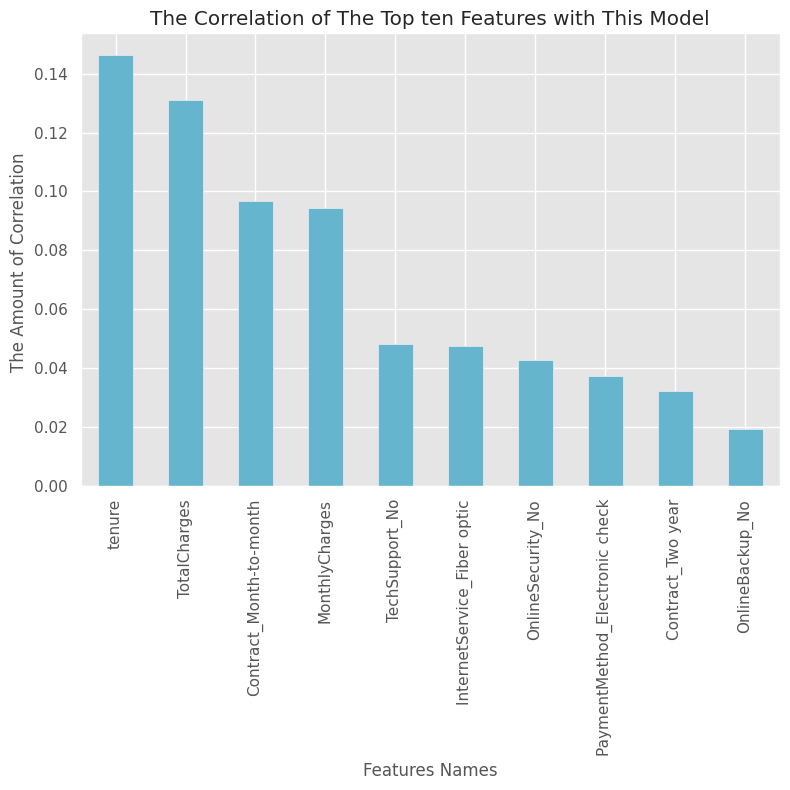

In [53]:
plt.figure(figsize=(8,8))
weights.sort_values(ascending=False)[:10].plot(kind='bar', color ='c')
plt.title('The Correlation of The Top ten Features with This Model')
plt.xlabel('Features Names')
plt.ylabel('The Amount of Correlation ')
plt.tight_layout()
plt.show()

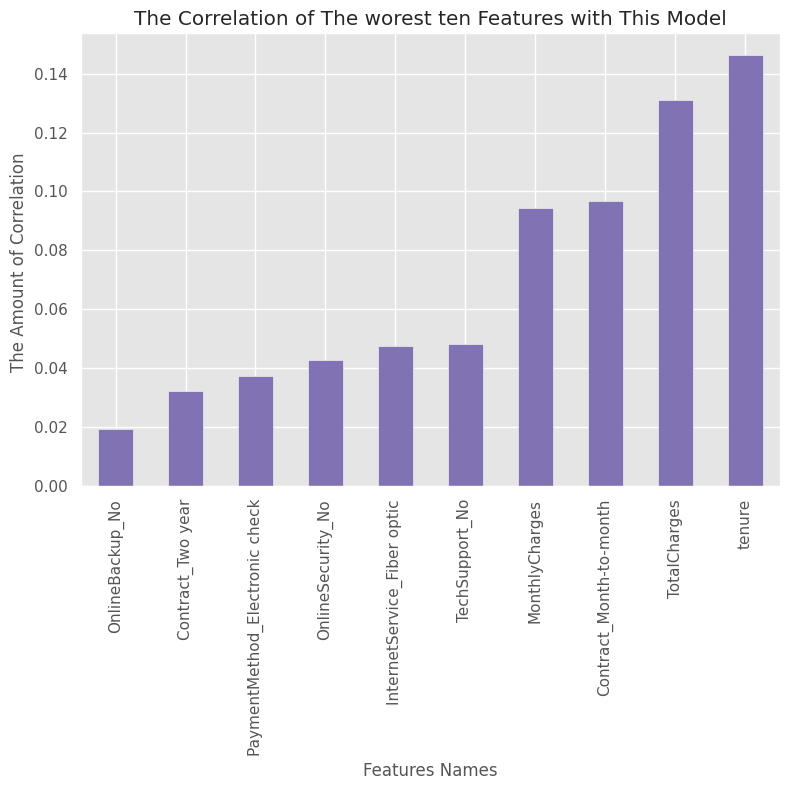

In [54]:
plt.figure(figsize=(8,8))
weights.sort_values(ascending=True)[-10:].plot(kind='bar', color ='m')
plt.title('The Correlation of The worest ten Features with This Model')
plt.xlabel('Features Names')
plt.ylabel('The Amount of Correlation ')
plt.tight_layout()
plt.show()

---------------------------------------------------------------
The Accuracy is 81.0%
---------------------------------------------------------------
---------------------------------------------------------------
THe Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1580
           1       0.66      0.51      0.57       530

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.80      0.81      0.80      2110

---------------------------------------------------------------
---------------------------------------------------------------
The F_1 Score Is 0.57
---------------------------------------------------------------
---------------------------------------------------------------
The Precision Score Is 0.66
---------------------------------------------------------------
-------------------------------------------------------------

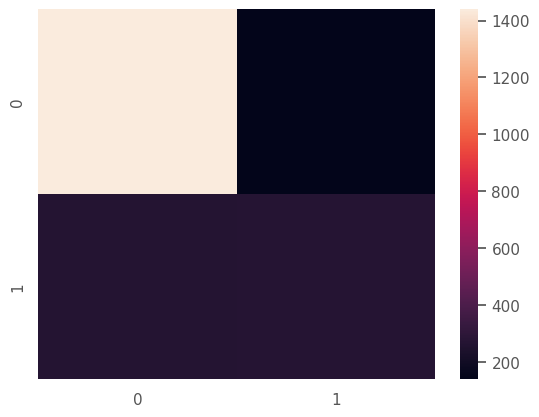

In [55]:
Classification_Matrics(Y_test,Prediction_test_1,Model_1,x,y, Number_of_cv=5)

# `Support Vector Machine (SVM)`

In [56]:
from sklearn.svm import SVC
Model_2 = SVC(C = 3.100531293444458, degree = 3, gamma = 'auto', kernel = 'rbf')
Model_2.fit(X_train , Y_train)

SVC(C=3.100531293444458, gamma='auto')

In [57]:
Prediction_test_2 = Model_2.predict(X_test)
print(f"The Model Accuracy is {metrics.accuracy_score(Y_test , Prediction_test_2)}")

The Model Accuracy is 0.8090047393364929


# `Tuning Paramters in "SVM" `

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
grid = { 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': uniform(loc=0, scale=4), 
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  }
np.random.seed(42)
Model =SVC()
RSCv =RandomizedSearchCV(estimator=Model ,
                        param_distributions=grid ,
                        n_iter= 20 ,
                        cv = 5 ,
                        verbose= 2 ,
                         n_jobs=-1)
RSCv.fit(X_train ,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f5302552710>,
                                        'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   verbose=2)

In [59]:
RSCv.best_estimator_

SVC(C=3.100531293444458, gamma='auto')

In [60]:
RSCv.best_params_

{'C': 3.100531293444458, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}

---------------------------------------------------------------
The Accuracy is 81.0%
---------------------------------------------------------------
---------------------------------------------------------------
THe Classification Report 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1580
           1       0.66      0.50      0.57       530

    accuracy                           0.81      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.80      0.81      0.80      2110

---------------------------------------------------------------
---------------------------------------------------------------
The F_1 Score Is 0.57
---------------------------------------------------------------
---------------------------------------------------------------
The Precision Score Is 0.66
---------------------------------------------------------------
-------------------------------------------------------------

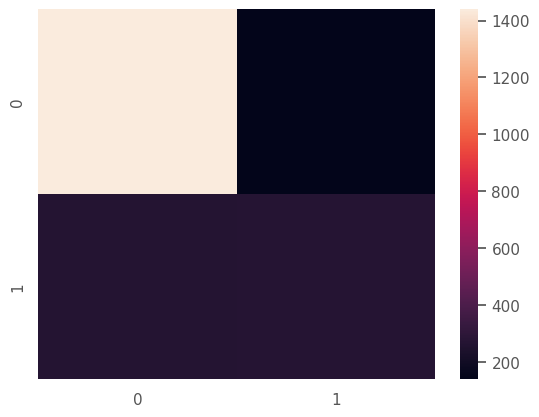

In [61]:
Classification_Matrics(Y_test,Prediction_test_2,Model_2,x,y, Number_of_cv=5)

# `AdaBoostClassifier`

In [62]:
from sklearn.ensemble import AdaBoostClassifier
Model_3 = AdaBoostClassifier()
Model_3.fit(X_train , Y_train)

AdaBoostClassifier()

In [63]:
Prediction_test_3 = Model_3.predict(X_test)
print(f"The Model Accuracy is {metrics.accuracy_score(Y_test , Prediction_test_3)}")

The Model Accuracy is 0.8104265402843602


In [64]:
Importances = Model_3.feature_importances_
weights = pd.Series(Importances , index= x.columns.values)

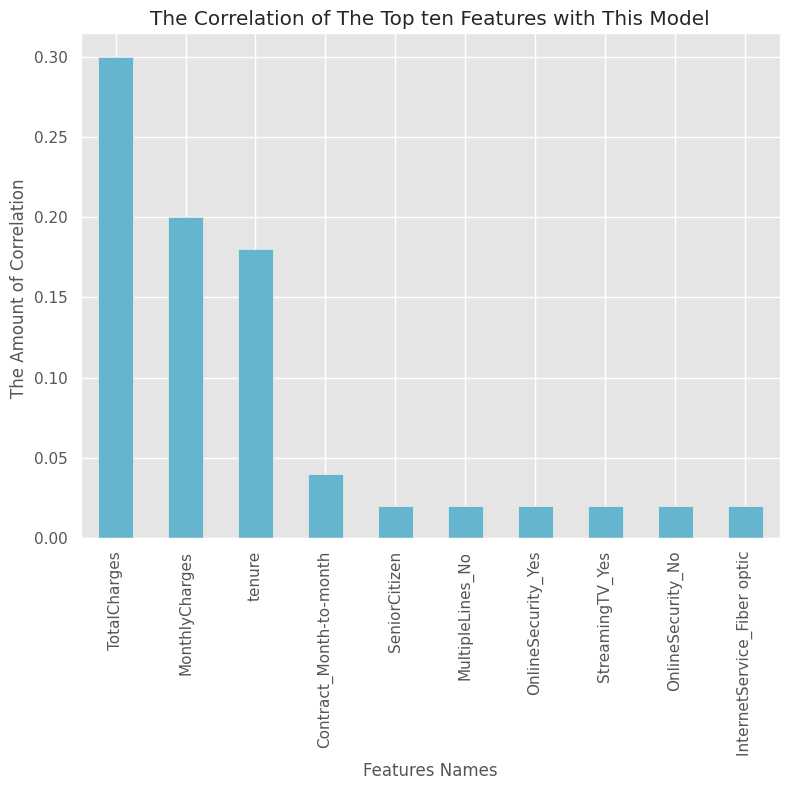

In [65]:
plt.figure(figsize=(8,8))
weights.sort_values(ascending=False)[:10].plot(kind='bar', color ='c')
plt.title('The Correlation of The Top ten Features with This Model')
plt.xlabel('Features Names')
plt.ylabel('The Amount of Correlation ')
plt.tight_layout()
plt.show()

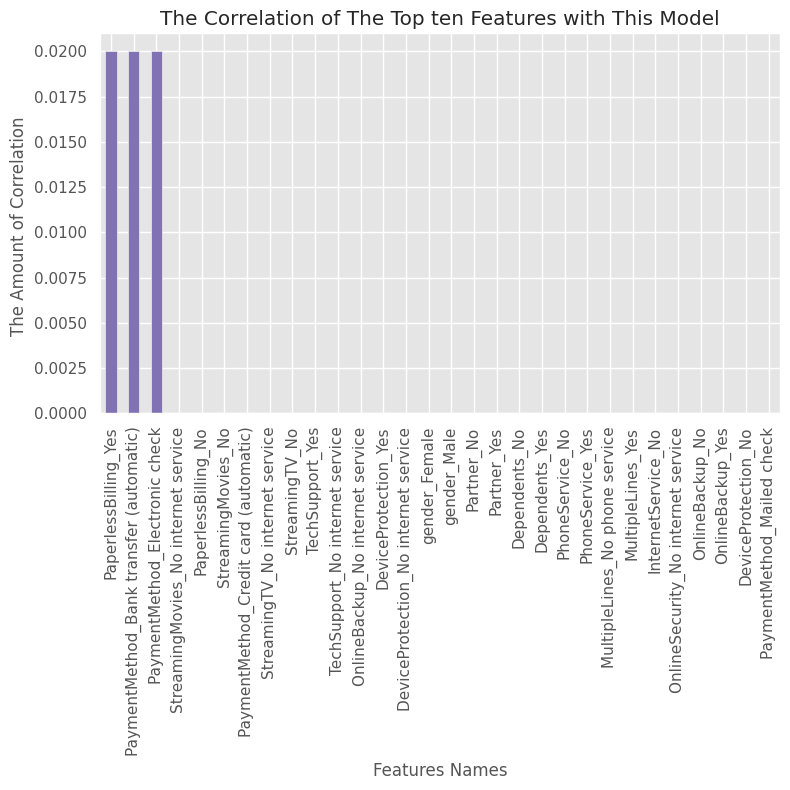

In [66]:
plt.figure(figsize=(8,8))
weights.sort_values(ascending=False)[-30:].plot(kind='bar', color ='m')
plt.title('The Correlation of The Top ten Features with This Model')
plt.xlabel('Features Names')
plt.ylabel('The Amount of Correlation ')
plt.tight_layout()
plt.show()

---------------------------------------------------------------
The Accuracy is 81.0%
---------------------------------------------------------------
---------------------------------------------------------------
THe Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1580
           1       0.64      0.55      0.59       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.81      2110

---------------------------------------------------------------
---------------------------------------------------------------
The F_1 Score Is 0.59
---------------------------------------------------------------
---------------------------------------------------------------
The Precision Score Is 0.64
---------------------------------------------------------------
-------------------------------------------------------------

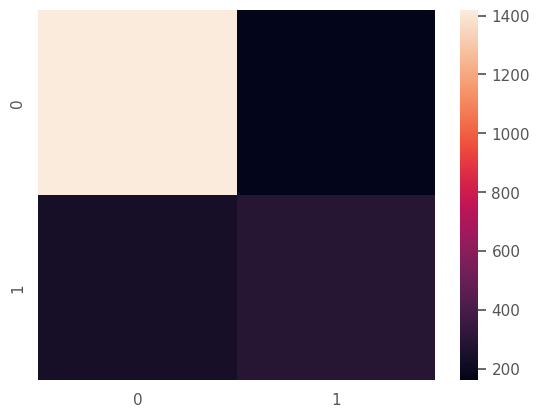

In [67]:
Classification_Matrics(Y_test,Prediction_test_3,Model_3,x,y, Number_of_cv=5)

# `XG Boost`

In [68]:
from xgboost import XGBClassifier
Model_4 = XGBClassifier()
Model_4.fit(X_train , Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [69]:
Prediction_test_4 = Model_4.predict(X_test)
print(f"The Model Accuracy is {metrics.accuracy_score(Y_test , Prediction_test_4)}")

The Model Accuracy is 0.7848341232227488


In [70]:
Importances = Model_4.feature_importances_
weights = pd.Series(Importances , index= x.columns.values)

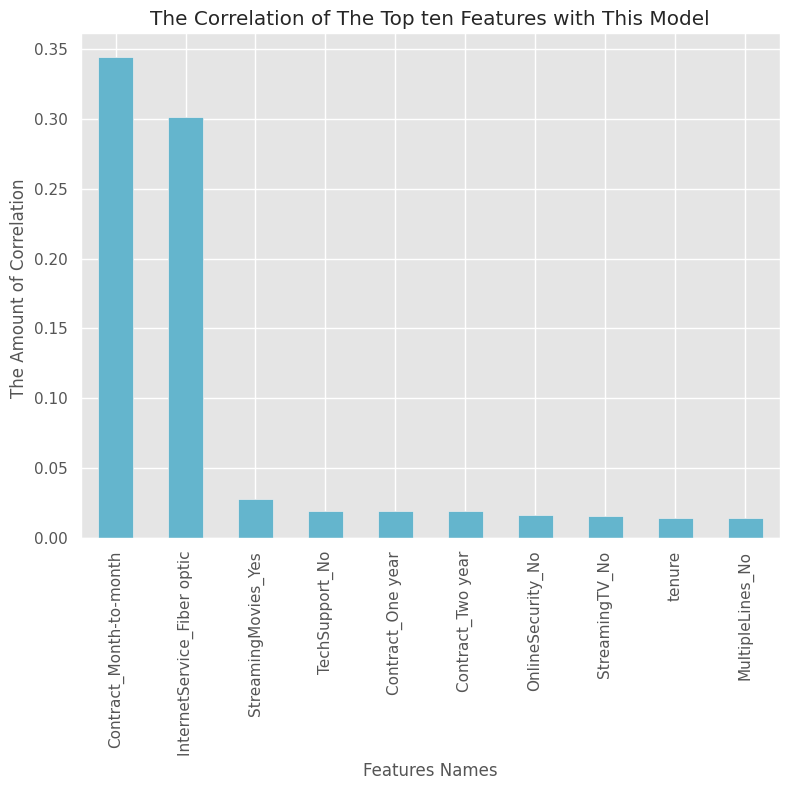

In [71]:
plt.figure(figsize=(8,8))
weights.sort_values(ascending=False)[:10].plot(kind='bar', color ='c')
plt.title('The Correlation of The Top ten Features with This Model')
plt.xlabel('Features Names')
plt.ylabel('The Amount of Correlation ')
plt.tight_layout()
plt.show()

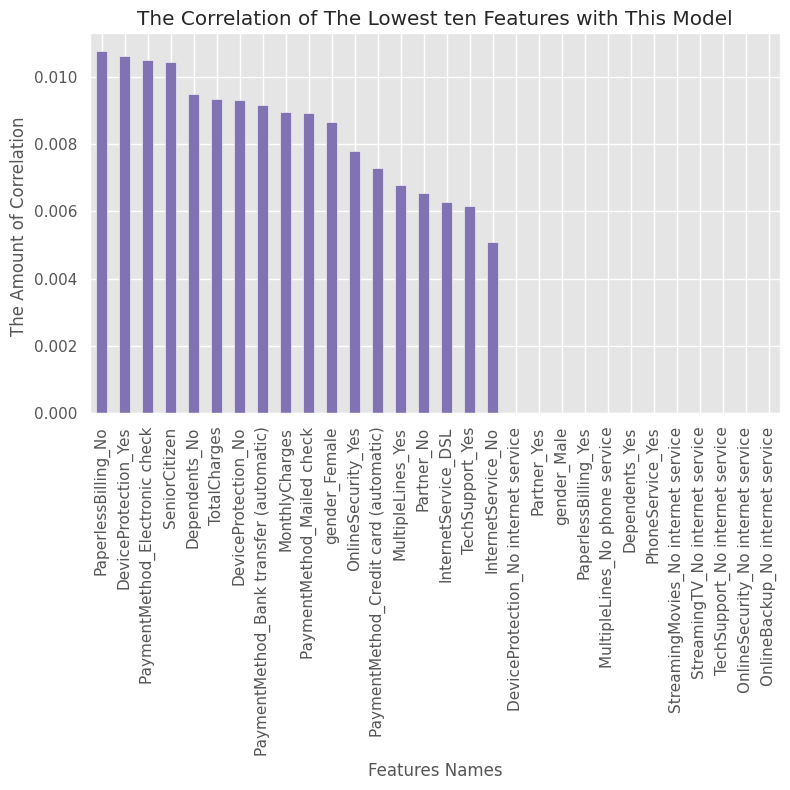

In [72]:
plt.figure(figsize=(8,8))
weights.sort_values(ascending=False)[-30:].plot(kind='bar', color ='m')
plt.title('The Correlation of The Lowest ten Features with This Model')
plt.xlabel('Features Names')
plt.ylabel('The Amount of Correlation ')
plt.tight_layout()
plt.show()

---------------------------------------------------------------
The Accuracy is 78.0%
---------------------------------------------------------------
---------------------------------------------------------------
THe Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1580
           1       0.58      0.52      0.55       530

    accuracy                           0.78      2110
   macro avg       0.71      0.70      0.70      2110
weighted avg       0.78      0.78      0.78      2110

---------------------------------------------------------------
---------------------------------------------------------------
The F_1 Score Is 0.55
---------------------------------------------------------------
---------------------------------------------------------------
The Precision Score Is 0.58
---------------------------------------------------------------
-------------------------------------------------------------

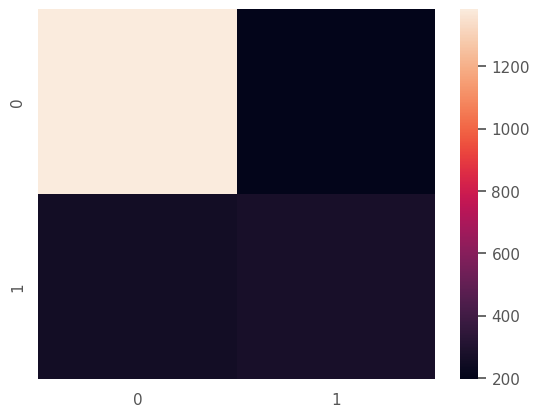

In [73]:
Classification_Matrics(Y_test,Prediction_test_4,Model_4,x,y, Number_of_cv=5)